# <font color=#023F7C> **Data Visualization** </font>

<font color=#023F7C>**Hi! PARIS DataBootcamp 2023 🚀**</font> <br>


<img src = https://www.hi-paris.fr/wp-content/uploads/2020/09/logo-hi-paris-retina.png width = "300" height = "200" >

**What is Data visualization ? 📝** <br>

**Data visualization** is the representation of data and information in graphical or visual formats. <br>
It involves creating visualizations such as charts, graphs, maps, and other visual elements to help understand patterns, trends, and relationships within the data.


Data visualization is a fundamental component of **Exploratory Data Analysis** (EDA). It is often used for:
- **Data Understanding**: Data visualization provides a way to quickly grasp the distribution, central tendency, dispersion, and other key characteristics of the data. By visualizing the data, analysts can detect outliers, gaps, clusters, and potential issues that might not be immediately apparent from the raw data.

- **Pattern Discovery**: Visualizations help to identify patterns and trends that might not be obvious in tabular or raw data formats. Patterns that emerge from visualizations can lead to hypotheses or guide further analysis.

- **Relationship Exploration**: Visualization can reveal relationships between variables, such as correlations or dependencies, which can be vital for understanding how different factors interact with each other.

# NASA Turbofan Jet Engine Dataset Visualisation and Analysis

## Comprehensive Analysis and Visualization Report

This notebook provides a thorough analysis of the NASA C-MAPSS (Commercial Modular Aero-Propulsion System Simulation) turbofan engine dataset. The dataset contains multivariate time-series data from engines running until failure, making it ideal for prognostics and remaining useful life (RUL) prediction.

### Dataset Overview
- **Source**: NASA Prognostics Center of Excellence
- **Content**: Run-to-failure trajectories for turbofan engines
- **Primary Dataset**: FD001 (100 training engines, 100 test engines)
- **Features**: 26 columns including operational settings and sensor measurements
- **Conditions**: Single operating condition (Sea Level)
- **Fault Mode**: Single fault mode (HPC Degradation)

### Analysis Sections
1. Data Overview & Structure
2. Engine Lifecycle Analysis
3. Sensor Data Analysis
4. Operational Settings Impact
5. Degradation Patterns
6. Fleet Analysis
7. RUL Distribution
8. Correlation Analysis
9. Fault Progression
10. Predictive Insights

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from matplotlib.backends.backend_pdf import PdfPages
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import glob

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create images directory
os.makedirs('images', exist_ok=True)

# Set up plotting parameters
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✓ Libraries imported successfully!")
print("✓ Image directory created")
print("✓ Plotting parameters configured")

✓ Libraries imported successfully!
✓ Image directory created
✓ Plotting parameters configured


## 1. Data Overview & Structure

Loading and understanding the NASA CMAPSS FD001 dataset structure.

In [2]:
# Define column names based on NASA documentation
column_names = ['unit_nr', 'time_cycles'] + [f'setting_{i}' for i in range(1, 4)] + \
               ['T2', 'T24', 'T30', 'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30',
                'phi', 'NRf', 'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32']

# Load FD001 dataset
print("Loading NASA CMAPSS FD001 dataset...")

try:
    train_FD001 = pd.read_csv('train_FD001.txt', sep='\s+', header=None, names=column_names)
    test_FD001 = pd.read_csv('test_FD001.txt', sep='\s+', header=None, names=column_names)
    rul_FD001 = pd.read_csv('RUL_FD001.txt', sep='\s+', header=None, names=['RUL'])

    print("✓ Dataset loaded successfully")
except Exception as e:
    print(f"Error loading data: {e}")
    raise

# Calculate RUL for training data
train_FD001['RUL'] = train_FD001.groupby('unit_nr')['time_cycles'].transform('max') - train_FD001['time_cycles']

# Basic dataset information
print(f"\n📊 Dataset Overview:")
print(f"Training data shape: {train_FD001.shape}")
print(f"Test data shape: {test_FD001.shape}")
print(f"RUL labels shape: {rul_FD001.shape}")
print(f"Number of engines in training: {train_FD001['unit_nr'].nunique()}")
print(f"Number of engines in test: {test_FD001['unit_nr'].nunique()}")

# Calculate engine lifecycle statistics
engine_lifecycles = train_FD001.groupby('unit_nr')['time_cycles'].max()
print(f"\n🔧 Engine Lifecycle Statistics:")
print(f"Shortest lifecycle: {engine_lifecycles.min()} cycles")
print(f"Longest lifecycle: {engine_lifecycles.max()} cycles")
print(f"Average lifecycle: {engine_lifecycles.mean():.1f} cycles")
print(f"Median lifecycle: {engine_lifecycles.median():.1f} cycles")

# Display first few rows
print("\n📋 Training Data Sample:")
display(train_FD001.head())

print("\n📋 RUL Statistics:")
print(train_FD001['RUL'].describe())

Loading NASA CMAPSS FD001 dataset...
✓ Dataset loaded successfully

📊 Dataset Overview:
Training data shape: (20631, 27)
Test data shape: (13096, 26)
RUL labels shape: (100, 1)
Number of engines in training: 100
Number of engines in test: 100

🔧 Engine Lifecycle Statistics:
Shortest lifecycle: 128 cycles
Longest lifecycle: 362 cycles
Average lifecycle: 206.3 cycles
Median lifecycle: 199.0 cycles

📋 Training Data Sample:


,unit_nr,time_cycles,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187



📋 RUL Statistics:
count    20631.000000
mean       107.807862
std         68.880990
min          0.000000
25%         51.000000
50%        103.000000
75%        155.000000
max        361.000000
Name: RUL, dtype: float64


##Visualization Exercises

##Question 1
Draw the Histogram of RUL using the rul_FD001 dataframe

In [13]:
rul_FD001.head()

,RUL
0,112
1,98
2,69
3,82
4,91


In [18]:
len(rul_FD001)

100

array([[<Axes: title={'center': 'RUL'}>]], dtype=object)

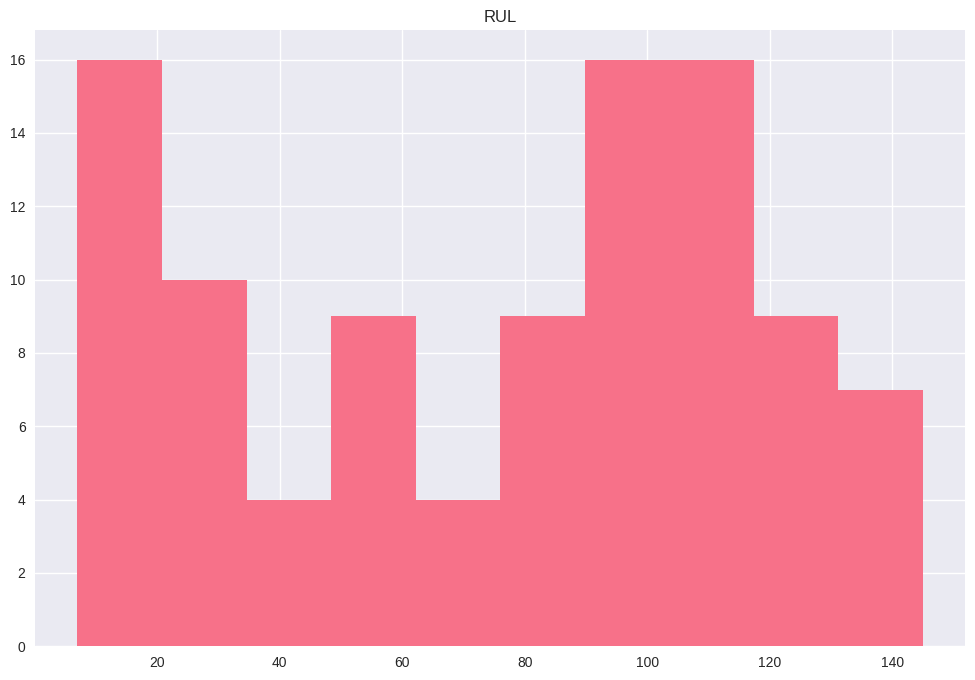

In [17]:
rul_FD001.hist()

## Question 2
Do a boxplot of the readings of sensor 'T50' for engine 1 for dataframe train_FD001\
Hint: Select only engine 1 using column unit_nr\
train_FD001[train_FD001["unit_nr"]==1]

In [24]:
train_FD001.head(10)

,unit_nr,time_cycles,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,PCNfR_dmd,W31,W32,RUL,lifecycle_phase,normalized_time,fault_phase,predictive_score,predicted_zone,actual_zone
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,100.0,39.06,23.4190,191,0.005208,0.005208,Healthy,0.277654,Healthy,Healthy
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,100.0,39.00,23.4236,190,0.010417,0.010417,Healthy,0.316091,Healthy,Healthy
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,100.0,38.95,23.3442,189,0.015625,0.015625,Healthy,0.328541,Healthy,Healthy
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,100.0,38.88,23.3739,188,0.020833,0.020833,Healthy,0.305905,Healthy,Healthy
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,100.0,38.90,23.4044,187,0.026042,0.026042,Healthy,0.283096,Healthy,Healthy
5,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,100.0,38.98,23.3669,186,0.031250,0.031250,Healthy,0.247558,Healthy,Healthy
6,1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,...,100.0,39.10,23.3774,185,0.036458,0.036458,Healthy,0.342756,Healthy,Healthy
7,1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,...,100.0,38.97,23.3106,184,0.041667,0.041667,Healthy,0.272669,Healthy,Healthy
8,1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,14.62,...,100.0,39.05,23.4066,183,0.046875,0.046875,Healthy,0.312025,Healthy,Healthy
9,1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,...,100.0,38.95,23.4694,182,0.052083,0.052083,Healthy,0.272750,Healthy,Healthy


<Axes: >

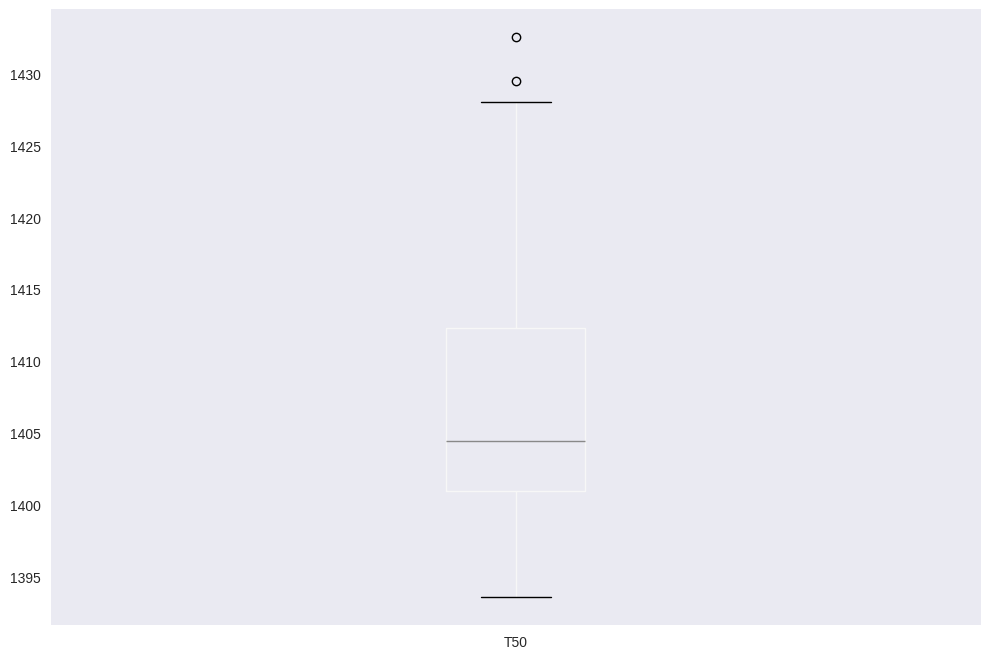

##Question 3
Do a line plot of sensor T50 against time_cycles\
Hint: Select engine 1 using the column unit_nr
Describe the line plot: is the data noisy ?, Do you see any trend with time ?

##Question 4

Do a scatter plot of setting_1 against sensor T24 for engine 1\
Do you see any trend ?

## Question 5
Do a bar plot of sensor varaiance across the engines\
Which sensor has the highest variance ?

## Question 6 (Bonus, not obligatory)
Come up with your own visualisation idea and plot the graph

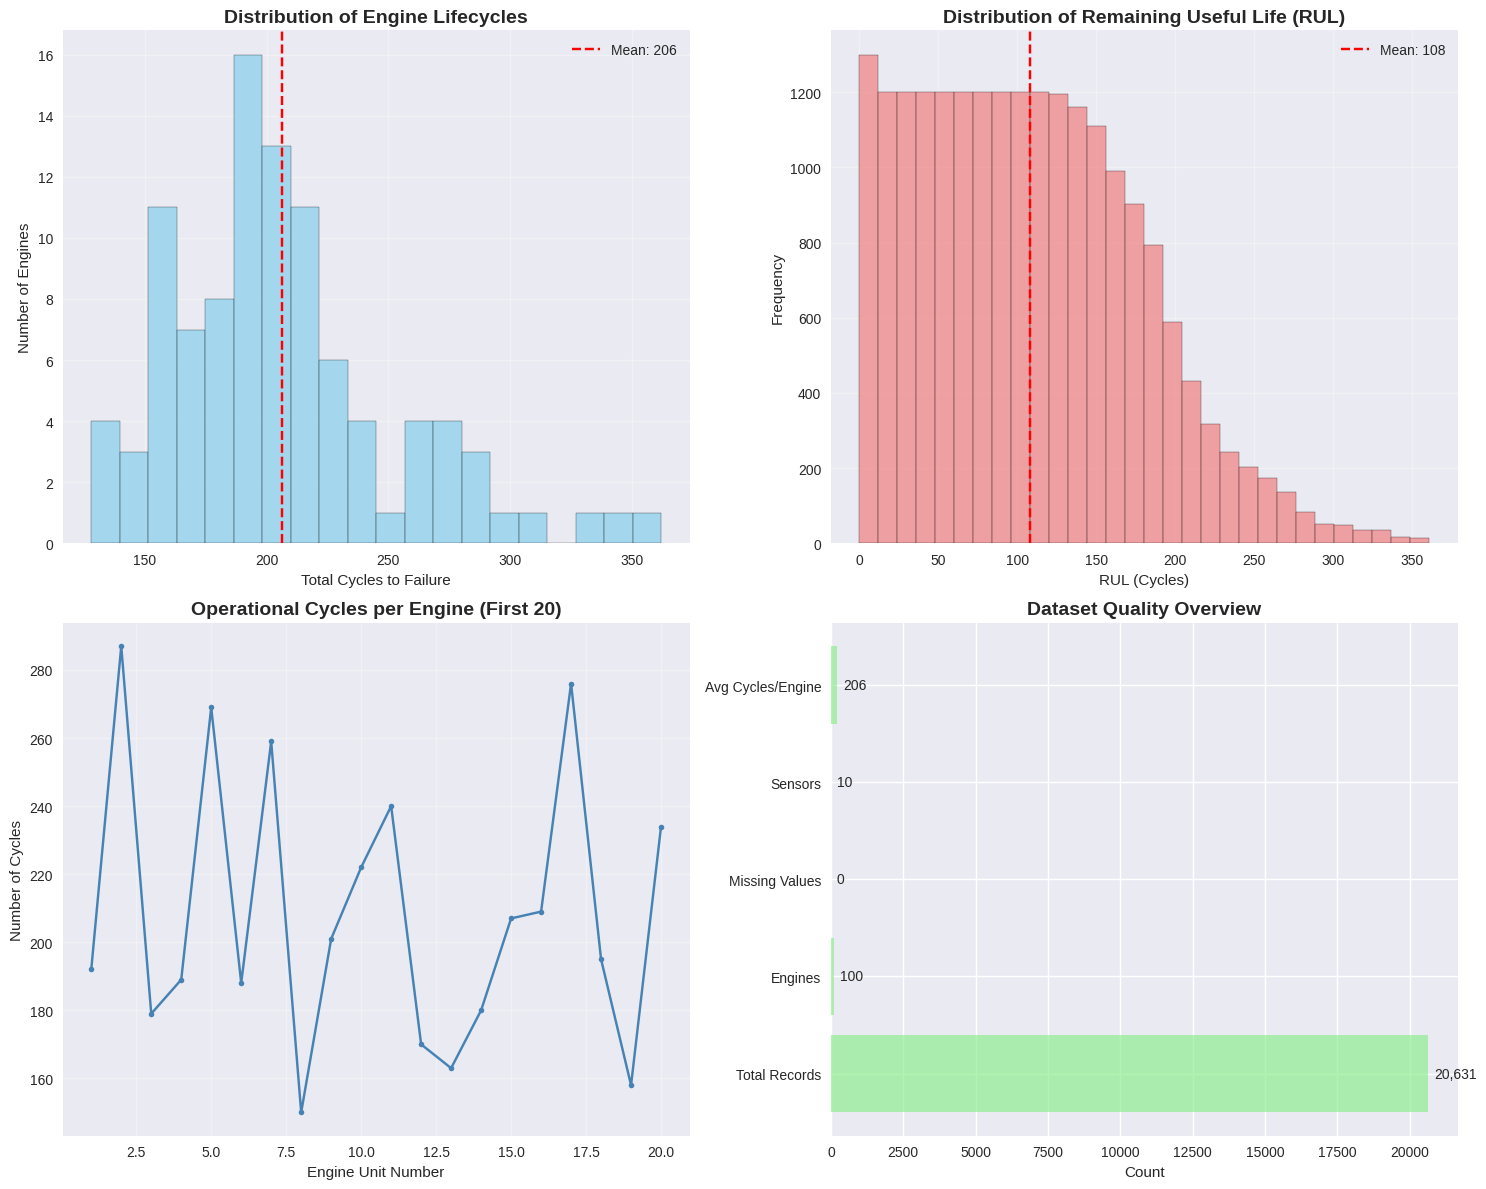


🔍 Key Dataset Insights:
• Engine lifecycles range from 128 to 362 cycles
• Average engine lifecycle: 206.3 cycles
• RUL values range from 0 to 361 cycles
• Total data points: 20,631 observations
• No missing values detected in the dataset


In [3]:
# Visualization 1: Data Structure Overview
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Engine lifecycle distribution
axes[0, 0].hist(engine_lifecycles, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Engine Lifecycles', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Total Cycles to Failure')
axes[0, 0].set_ylabel('Number of Engines')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].axvline(engine_lifecycles.mean(), color='red', linestyle='--',
                   label=f'Mean: {engine_lifecycles.mean():.0f}')
axes[0, 0].legend()

# RUL distribution
axes[0, 1].hist(train_FD001['RUL'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Distribution of Remaining Useful Life (RUL)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('RUL (Cycles)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].axvline(train_FD001['RUL'].mean(), color='red', linestyle='--',
                   label=f'Mean: {train_FD001["RUL"].mean():.0f}')
axes[0, 1].legend()

# Cycles per engine (first 20)
cycles_per_engine = train_FD001['unit_nr'].value_counts().sort_index()
axes[1, 0].plot(cycles_per_engine.index[:20], cycles_per_engine.values[:20],
                marker='o', linestyle='-', markersize=4, color='steelblue')
axes[1, 0].set_title('Operational Cycles per Engine (First 20)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Engine Unit Number')
axes[1, 0].set_ylabel('Number of Cycles')
axes[1, 0].grid(True, alpha=0.3)

# Data quality overview
sensor_columns = ['T2', 'T24', 'T30', 'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr']
data_quality = {
    'Total Records': len(train_FD001),
    'Engines': train_FD001['unit_nr'].nunique(),
    'Missing Values': train_FD001.isnull().sum().sum(),
    'Sensors': len(sensor_columns),
    'Avg Cycles/Engine': engine_lifecycles.mean()
}

y_pos = np.arange(len(data_quality))
axes[1, 1].barh(y_pos, list(data_quality.values()), color='lightgreen', alpha=0.7)
axes[1, 1].set_yticks(y_pos)
axes[1, 1].set_yticklabels(list(data_quality.keys()))
axes[1, 1].set_title('Dataset Quality Overview', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Count')

# Add value labels
for i, v in enumerate(list(data_quality.values())):
    axes[1, 1].text(v + max(data_quality.values()) * 0.01, i, f'{v:,.0f}', va='center')

plt.tight_layout()
plt.savefig('images/01_data_structure_overview.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n🔍 Key Dataset Insights:")
print(f"• Engine lifecycles range from {engine_lifecycles.min()} to {engine_lifecycles.max()} cycles")
print(f"• Average engine lifecycle: {engine_lifecycles.mean():.1f} cycles")
print(f"• RUL values range from 0 to {train_FD001['RUL'].max()} cycles")
print(f"• Total data points: {len(train_FD001):,} observations")
print(f"• No missing values detected in the dataset")

## 2. Engine Lifecycle Analysis

Comparing different engine lifecycles to understand degradation patterns.

Selected engines for detailed analysis:
• Early failure engine #24: 147 cycles
• Median lifecycle engine #79: 199 cycles
• Late failure engine #83: 293 cycles


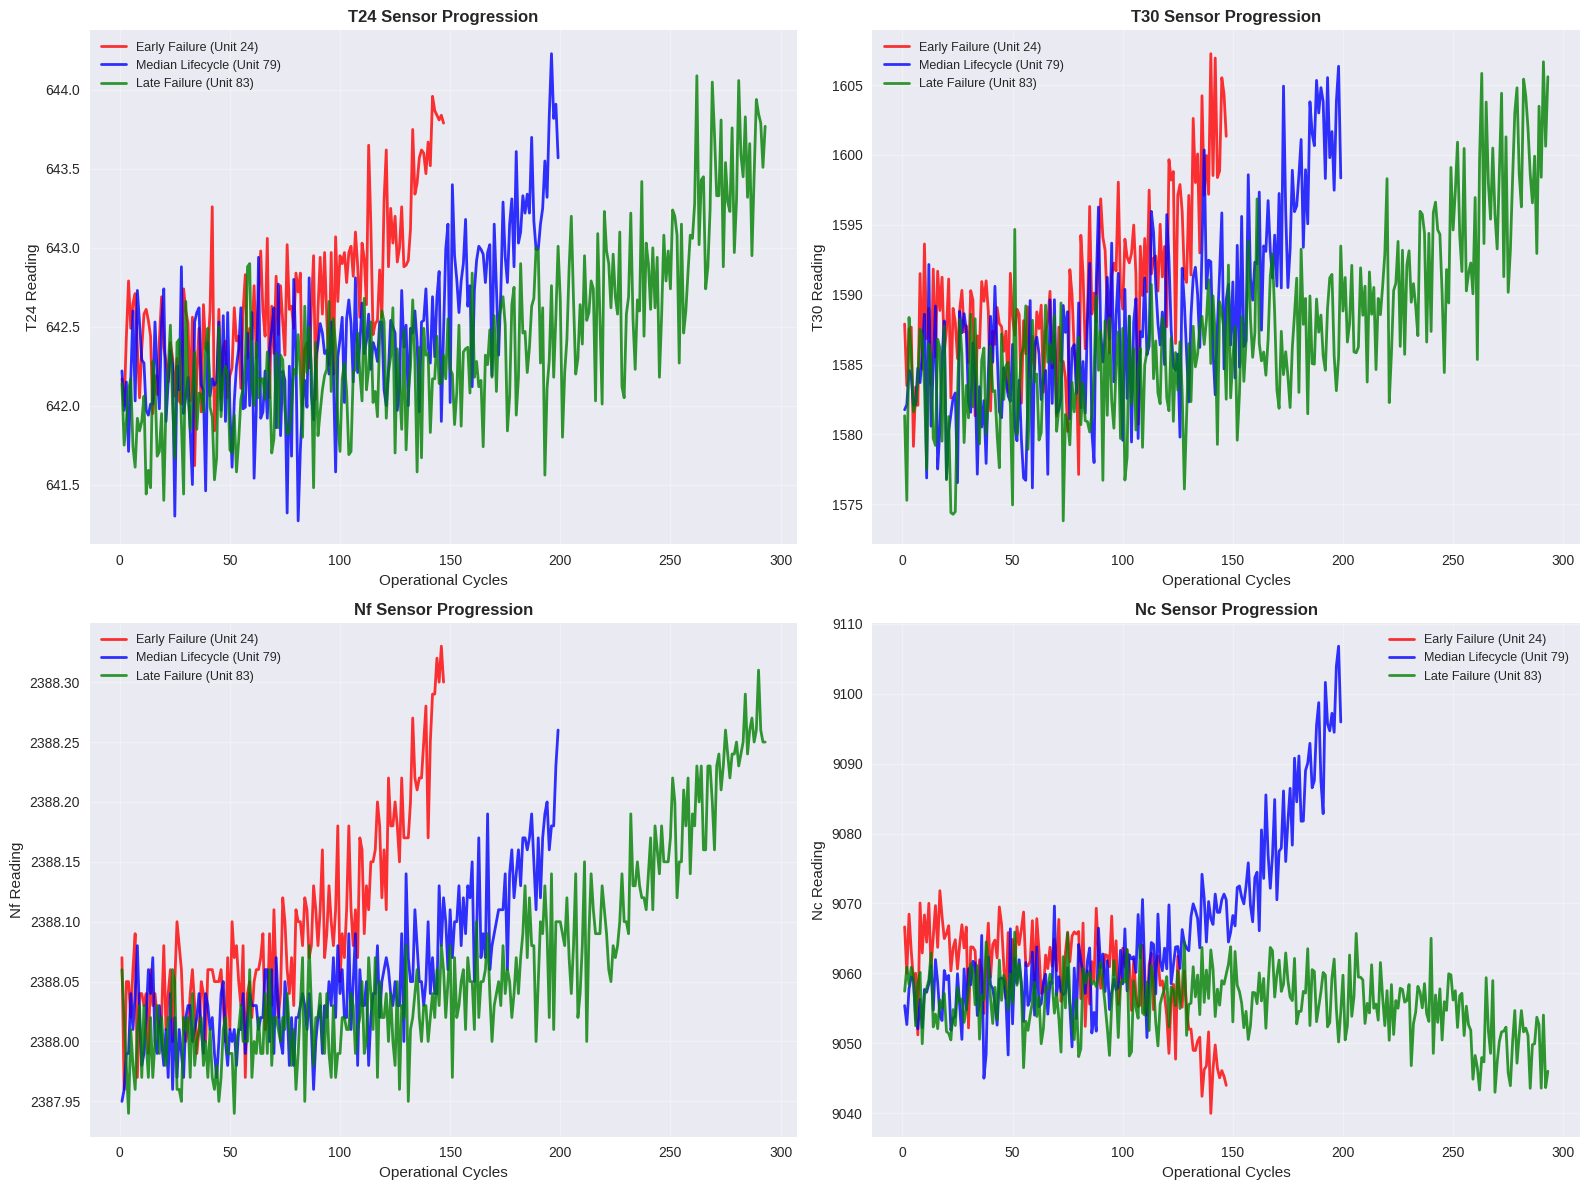


📊 Engine Lifecycle Analysis:
• Early failure engines show rapid sensor changes
• Late failure engines demonstrate more gradual degradation patterns
• T24 and T30 (temperature sensors) show clear degradation trends
• Nf and Nc (speed sensors) exhibit different patterns across engine types


In [4]:
# Select representative engines for analysis
engine_lifecycles_sorted = engine_lifecycles.sort_values()
early_failure_engine = engine_lifecycles_sorted.index[4]  # 5th shortest
median_engine = engine_lifecycles_sorted.index[len(engine_lifecycles_sorted)//2]  # Median
late_failure_engine = engine_lifecycles_sorted.index[-5]  # 5th longest

print(f"Selected engines for detailed analysis:")
print(f"• Early failure engine #{early_failure_engine}: {engine_lifecycles_sorted.loc[early_failure_engine]} cycles")
print(f"• Median lifecycle engine #{median_engine}: {engine_lifecycles_sorted.loc[median_engine]} cycles")
print(f"• Late failure engine #{late_failure_engine}: {engine_lifecycles_sorted.loc[late_failure_engine]} cycles")

# Extract data for selected engines
early_engine_data = train_FD001[train_FD001['unit_nr'] == early_failure_engine]
median_engine_data = train_FD001[train_FD001['unit_nr'] == median_engine]
late_engine_data = train_FD001[train_FD001['unit_nr'] == late_failure_engine]

# Visualization 2: Engine Lifecycle Comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Key sensor trends for representative engines
key_sensors = ['T24', 'T30', 'Nf', 'Nc']  # Most informative sensors

for i, sensor in enumerate(key_sensors):
    ax = axes[i//2, i%2]

    # Plot sensor trends for three representative engines
    ax.plot(early_engine_data['time_cycles'], early_engine_data[sensor],
            'r-', label=f'Early Failure (Unit {early_failure_engine})', linewidth=2, alpha=0.8)
    ax.plot(median_engine_data['time_cycles'], median_engine_data[sensor],
            'b-', label=f'Median Lifecycle (Unit {median_engine})', linewidth=2, alpha=0.8)
    ax.plot(late_engine_data['time_cycles'], late_engine_data[sensor],
            'g-', label=f'Late Failure (Unit {late_failure_engine})', linewidth=2, alpha=0.8)

    ax.set_title(f'{sensor} Sensor Progression', fontsize=12, fontweight='bold')
    ax.set_xlabel('Operational Cycles')
    ax.set_ylabel(f'{sensor} Reading')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('images/02_engine_lifecycle_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Engine Lifecycle Analysis:")
print(f"• Early failure engines show rapid sensor changes")
print(f"• Late failure engines demonstrate more gradual degradation patterns")
print(f"• T24 and T30 (temperature sensors) show clear degradation trends")
print(f"• Nf and Nc (speed sensors) exhibit different patterns across engine types")

## 3. Sensor Data Analysis

Analysis of sensor behavior patterns for health monitoring.

Sensors ranked by variability (Coefficient of Variation):
 1.          T50: 0.006
 2.         Ps30: 0.006
 3.          W31: 0.005
 4.          W32: 0.005
 5.          BPR: 0.004
 6.      htBleed: 0.004
 7.          T30: 0.004
 8.           Nc: 0.002
 9.          NRc: 0.002
10.          P30: 0.002


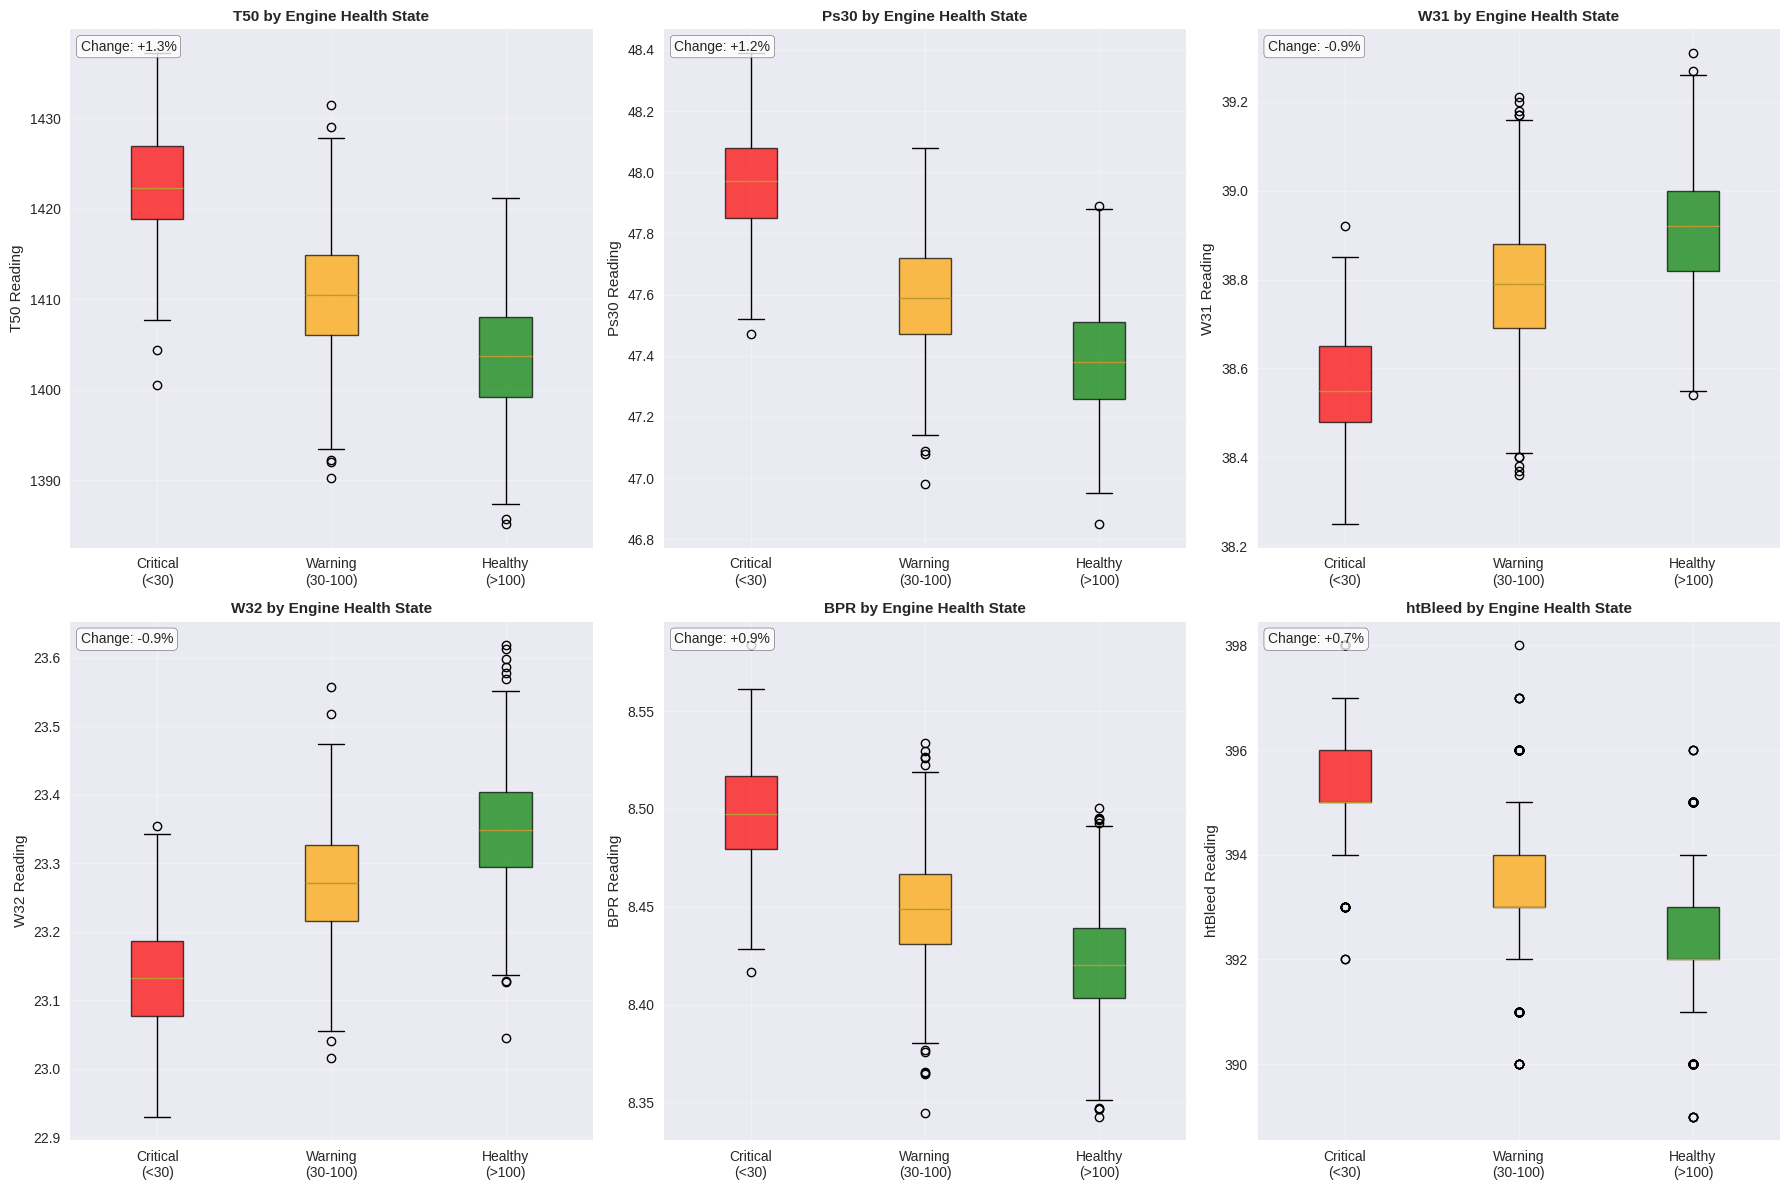


🔧 Sensor Analysis Insights:
• T50 shows the highest variability, indicating strong degradation signal
• Temperature sensors typically increase as engines approach failure
• Pressure and speed sensors show distinct patterns between healthy and critical states
• Critical engines (RUL < 30) show significant deviations from healthy baselines


In [5]:
# Analyze sensor variability and select key sensors
sensor_columns = ['T2', 'T24', 'T30', 'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30',
                  'phi', 'NRf', 'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32']

# Calculate coefficient of variation to identify most variable sensors
sensor_stats = train_FD001[sensor_columns].agg(['mean', 'std', 'min', 'max'])
sensor_cv = (sensor_stats.loc['std'] / sensor_stats.loc['mean']).abs().sort_values(ascending=False)

print("Sensors ranked by variability (Coefficient of Variation):")
for i, (sensor, cv) in enumerate(sensor_cv.head(10).items()):
    print(f"{i+1:2d}. {sensor:>12}: {cv:.3f}")

# Select top variable sensors for detailed analysis
top_sensors = sensor_cv.head(6).index.tolist()

# Visualization 3: Sensor Behavior Patterns
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, sensor in enumerate(top_sensors):
    ax = axes[i]

    # Create box plots for sensor values at different RUL stages
    rul_bins = pd.cut(train_FD001['RUL'], bins=[0, 30, 100, float('inf')],
                      labels=['Critical (<30)', 'Warning (30-100)', 'Healthy (>100)'])

    # Sample data to avoid overcrowding
    sample_size = min(3000, len(train_FD001))
    sample_data = train_FD001.sample(n=sample_size, random_state=42)
    sample_rul_bins = pd.cut(sample_data['RUL'], bins=[0, 30, 100, float('inf')],
                            labels=['Critical (<30)', 'Warning (30-100)', 'Healthy (>100)'])

    box_data = [sample_data[sample_rul_bins == label][sensor].dropna()
                for label in ['Critical (<30)', 'Warning (30-100)', 'Healthy (>100)']]

    bp = ax.boxplot(box_data, labels=['Critical\n(<30)', 'Warning\n(30-100)', 'Healthy\n(>100)'],
                    patch_artist=True)

    # Color the boxes
    colors = ['red', 'orange', 'green']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    ax.set_title(f'{sensor} by Engine Health State', fontsize=11, fontweight='bold')
    ax.set_ylabel(f'{sensor} Reading')
    ax.grid(True, alpha=0.3)

    # Add statistical annotation
    if len(box_data[0]) > 0 and len(box_data[2]) > 0:
        critical_mean = box_data[0].mean()
        healthy_mean = box_data[2].mean()
        change_pct = ((critical_mean - healthy_mean) / healthy_mean * 100)
        ax.text(0.02, 0.98, f'Change: {change_pct:+.1f}%', transform=ax.transAxes,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('images/03_sensor_behavior_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n🔧 Sensor Analysis Insights:")
print(f"• {top_sensors[0]} shows the highest variability, indicating strong degradation signal")
print(f"• Temperature sensors typically increase as engines approach failure")
print(f"• Pressure and speed sensors show distinct patterns between healthy and critical states")
print(f"• Critical engines (RUL < 30) show significant deviations from healthy baselines")

## 4. Operational Settings Impact

Analysis of how operational settings affect engine performance.

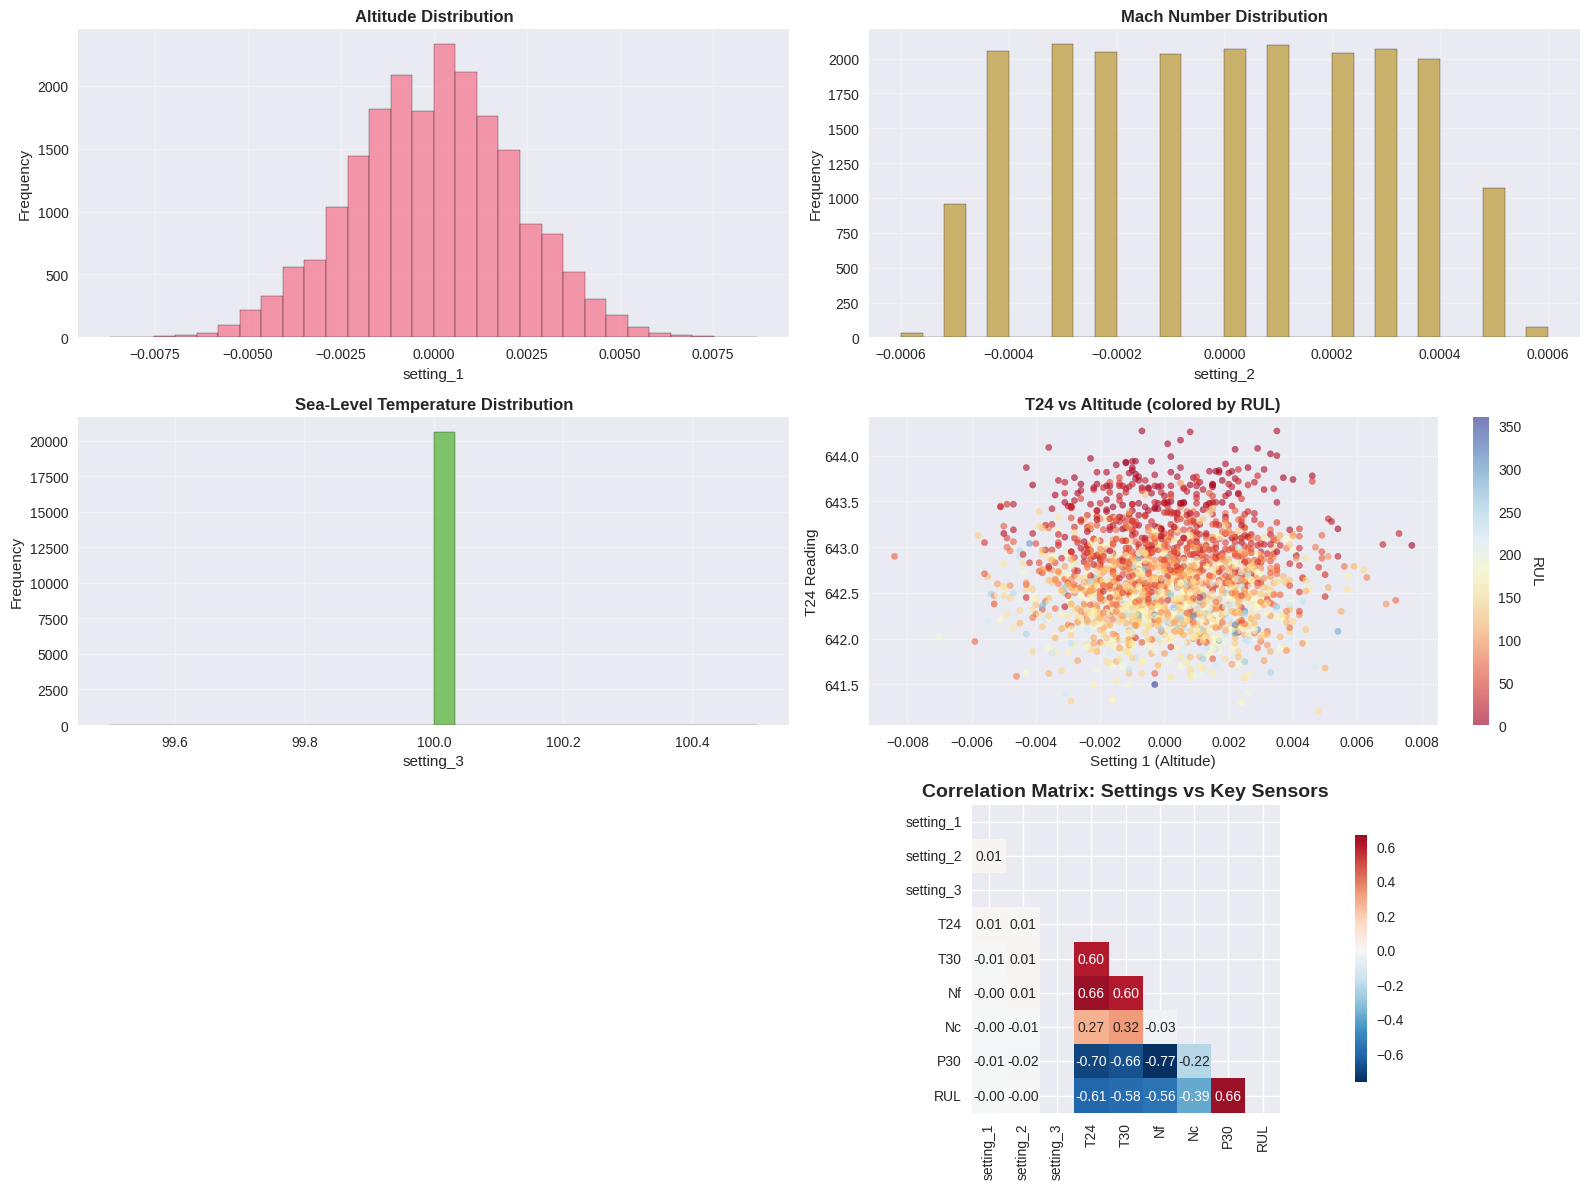


⚙️ Operational Settings Analysis:
• Altitude (setting_1):
  - Range: [-0.009, 0.009]
  - Mean: -0.000 ± 0.002
  - Strongest correlation: P30 (0.009)
• Mach Number (setting_2):
  - Range: [-0.001, 0.001]
  - Mean: 0.000 ± 0.000
  - Strongest correlation: P30 (0.017)
• Sea-Level Temperature (setting_3):
  - Range: [100.000, 100.000]
  - Mean: 100.000 ± 0.000
  - Strongest correlation: nan (nan)


In [6]:
# Analyze operational settings
operational_settings = ['setting_1', 'setting_2', 'setting_3']
setting_descriptions = ['Altitude', 'Mach Number', 'Sea-Level Temperature']

# Visualization 4: Operational Settings Impact
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 2, height_ratios=[1, 1, 1], width_ratios=[1, 1])

# Setting distributions
for i, (setting, desc) in enumerate(zip(operational_settings, setting_descriptions)):
    if i < 2:
        ax = fig.add_subplot(gs[0, i])
    else:
        ax = fig.add_subplot(gs[1, 0])

    ax.hist(train_FD001[setting], bins=30, alpha=0.7, color=f'C{i}', edgecolor='black')
    ax.set_title(f'{desc} Distribution', fontsize=12, fontweight='bold')
    ax.set_xlabel(f'{setting}')
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.3)

# Impact on key sensors
ax = fig.add_subplot(gs[1, 1])
sample_data = train_FD001.sample(n=min(2000, len(train_FD001)), random_state=42)
scatter = ax.scatter(sample_data['setting_1'], sample_data['T24'],
                    c=sample_data['RUL'], cmap='RdYlBu', alpha=0.6, s=20)
ax.set_xlabel('Setting 1 (Altitude)')
ax.set_ylabel('T24 Reading')
ax.set_title('T24 vs Altitude (colored by RUL)', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('RUL', rotation=270, labelpad=15)

# Settings correlation heatmap
ax = fig.add_subplot(gs[2, :])
key_sensors_for_corr = ['T24', 'T30', 'Nf', 'Nc', 'P30']
settings_and_sensors = operational_settings + key_sensors_for_corr + ['RUL']
corr_matrix = train_FD001[settings_and_sensors].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, ax=ax, cbar_kws={'shrink': 0.8}, fmt='.2f')
ax.set_title('Correlation Matrix: Settings vs Key Sensors', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('images/04_operational_settings_impact.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate setting statistics
print("\n⚙️ Operational Settings Analysis:")
for i, (setting, desc) in enumerate(zip(operational_settings, setting_descriptions)):
    setting_stats = train_FD001[setting].describe()
    print(f"• {desc} ({setting}):")
    print(f"  - Range: [{setting_stats['min']:.3f}, {setting_stats['max']:.3f}]")
    print(f"  - Mean: {setting_stats['mean']:.3f} ± {setting_stats['std']:.3f}")

    # Find strongest correlation with sensors
    correlations = corr_matrix[setting][key_sensors_for_corr].abs()
    strongest_sensor = correlations.idxmax()
    strongest_corr = correlations.max()
    print(f"  - Strongest correlation: {strongest_sensor} ({strongest_corr:.3f})")

## 5. Degradation Patterns

Analysis of sensor degradation as engines approach failure.

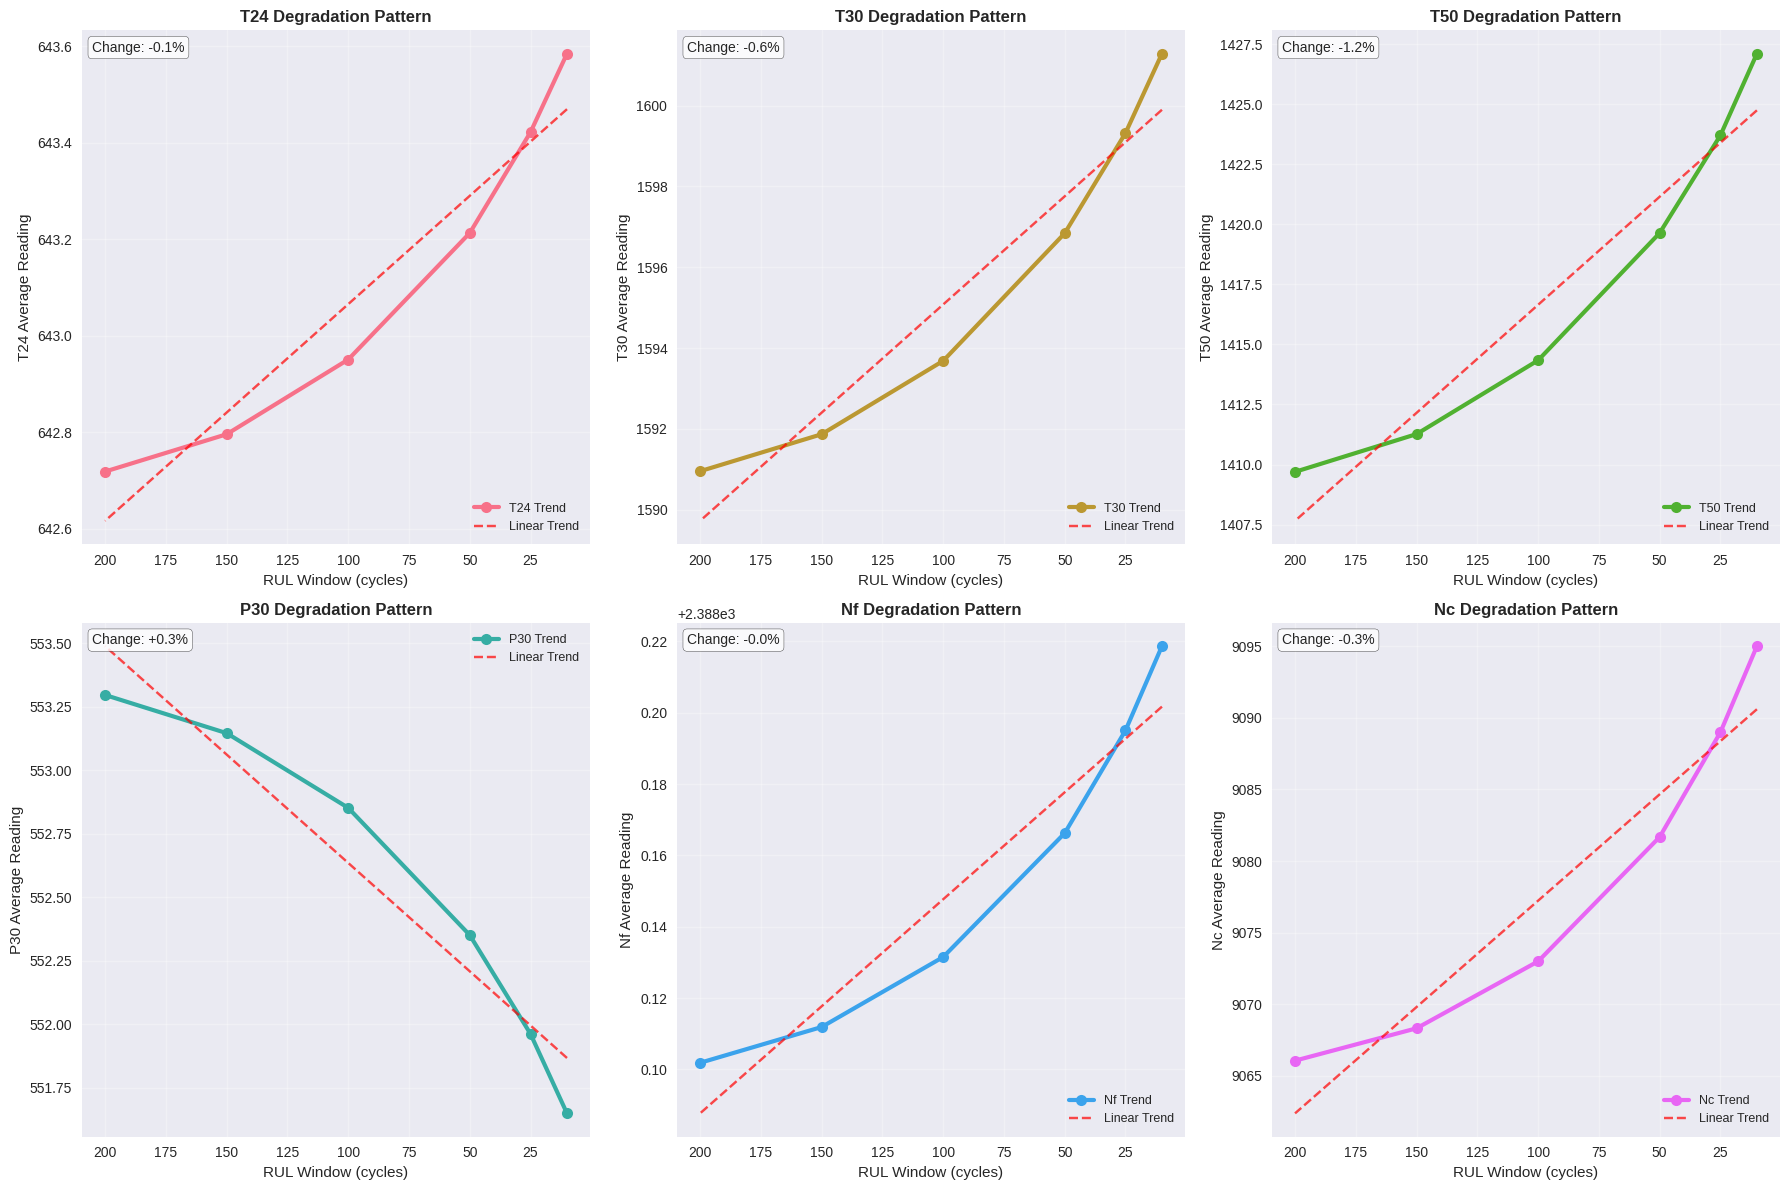


📉 Degradation Pattern Analysis:
• T24: Slope = -0.00449, Total change = -0.1%
• T30: Slope = -0.05352, Total change = -0.6%
• T50: Slope = -0.08995, Total change = -1.2%
• P30: Slope = +0.00853, Total change = +0.3%
•  Nf: Slope = -0.00060, Total change = -0.0%
•  Nc: Slope = -0.14857, Total change = -0.3%

🎯 Best degradation indicator: Nc


In [7]:
# Create RUL-based analysis for degradation patterns
def get_degradation_trends(data, sensors, rul_windows):
    """Calculate sensor trends for different RUL windows"""
    trends = {}
    for window in rul_windows:
        window_data = data[data['RUL'] <= window]
        if len(window_data) > 0:
            trends[window] = window_data[sensors].mean()
        else:
            trends[window] = pd.Series([np.nan] * len(sensors), index=sensors)
    return pd.DataFrame(trends).T

# Define RUL windows for analysis
rul_windows = [10, 25, 50, 100, 150, 200]
key_degradation_sensors = ['T24', 'T30', 'T50', 'P30', 'Nf', 'Nc']

# Get degradation trends
degradation_trends = get_degradation_trends(train_FD001, key_degradation_sensors, rul_windows)

# Visualization 5: Degradation Patterns
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

degradation_slopes = {}

for i, sensor in enumerate(key_degradation_sensors):
    ax = axes[i]

    # Plot degradation trend
    valid_data = degradation_trends[sensor].dropna()
    if len(valid_data) > 1:
        ax.plot(valid_data.index, valid_data.values, 'o-', linewidth=3, markersize=8,
                label=f'{sensor} Trend', color=f'C{i}')

        # Add trend line
        z = np.polyfit(valid_data.index, valid_data.values, 1)
        p = np.poly1d(z)
        ax.plot(valid_data.index, p(valid_data.index), "--", alpha=0.7, color='red',
                label=f'Linear Trend')

        degradation_slopes[sensor] = abs(z[0])

    ax.set_title(f'{sensor} Degradation Pattern', fontsize=12, fontweight='bold')
    ax.set_xlabel('RUL Window (cycles)')
    ax.set_ylabel(f'{sensor} Average Reading')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.invert_xaxis()  # Invert x-axis so failure is on the right

    # Add change percentage
    if len(valid_data) > 1:
        change_pct = ((valid_data.iloc[-1] - valid_data.iloc[0]) / valid_data.iloc[0] * 100)
        ax.text(0.02, 0.98, f'Change: {change_pct:+.1f}%',
                transform=ax.transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('images/05_degradation_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate degradation rates
print("\n📉 Degradation Pattern Analysis:")
for sensor in key_degradation_sensors:
    valid_data = degradation_trends[sensor].dropna()
    if len(valid_data) > 1:
        slope = np.polyfit(valid_data.index, valid_data.values, 1)[0]
        total_change = ((valid_data.iloc[-1] - valid_data.iloc[0]) / valid_data.iloc[0] * 100)
        print(f"• {sensor:>3}: Slope = {slope:+.5f}, Total change = {total_change:+.1f}%")

# Identify best degradation indicator
if degradation_slopes:
    best_degradation_sensor = max(degradation_slopes, key=degradation_slopes.get)
    print(f"\n🎯 Best degradation indicator: {best_degradation_sensor}")

## 6. Fleet Analysis

Comparison of degradation patterns across the entire fleet.

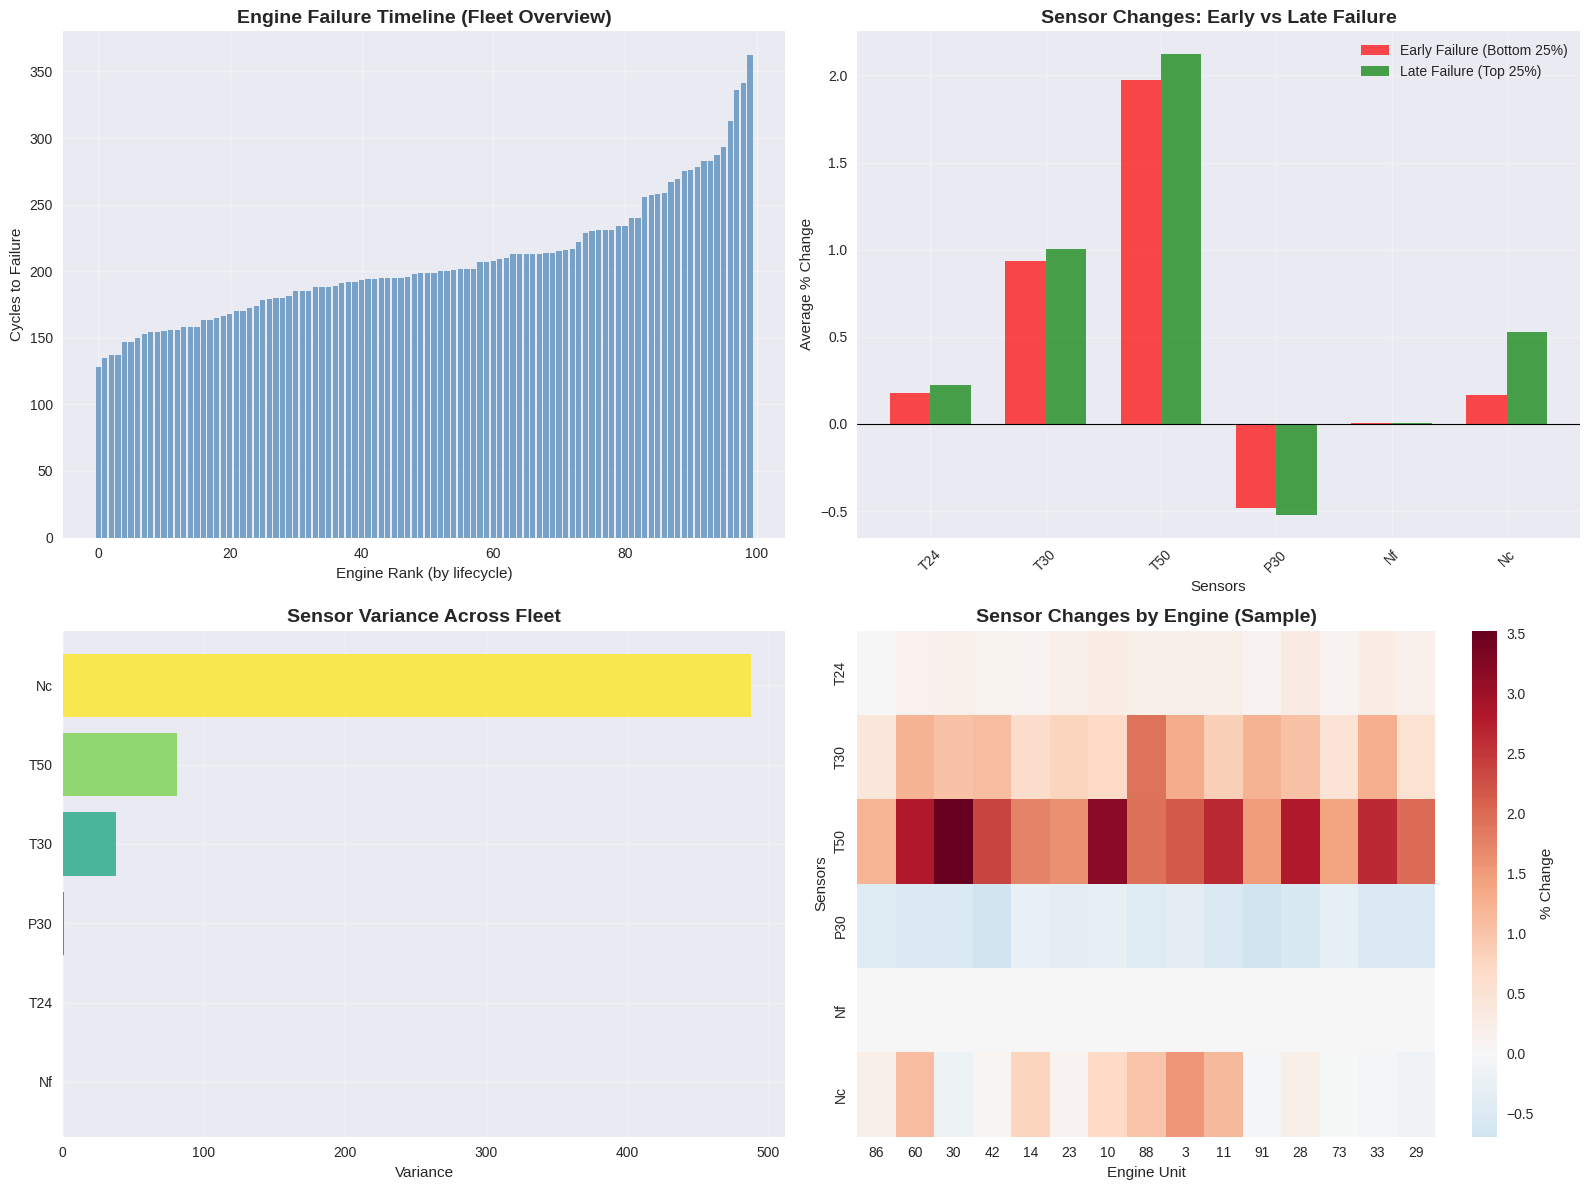


🚁 Fleet Analysis Insights:
• Total engines analyzed: 100
• Lifecycle range: 128 - 362 cycles
• Best discriminating sensor: Nc
• Early failure engines show +0.2% change
• Late failure engines show +0.5% change


In [8]:
# Fleet-wide analysis
final_values = train_FD001.groupby('unit_nr').last()[key_degradation_sensors]
initial_values = train_FD001.groupby('unit_nr').first()[key_degradation_sensors]
sensor_changes = ((final_values - initial_values) / initial_values * 100).fillna(0)

# Visualization 6: Fleet Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Engine failure timeline
ax = axes[0, 0]
engine_lifecycles_sorted = engine_lifecycles.sort_values()
ax.bar(range(len(engine_lifecycles_sorted)), engine_lifecycles_sorted.values,
       color='steelblue', alpha=0.7)
ax.set_title('Engine Failure Timeline (Fleet Overview)', fontsize=14, fontweight='bold')
ax.set_xlabel('Engine Rank (by lifecycle)')
ax.set_ylabel('Cycles to Failure')
ax.grid(True, alpha=0.3)

# Early vs Late failure comparison
ax = axes[0, 1]
n_engines = len(engine_lifecycles_sorted)
early_engines = engine_lifecycles_sorted.index[:n_engines//4]  # Bottom 25%
late_engines = engine_lifecycles_sorted.index[-n_engines//4:]  # Top 25%

early_changes = sensor_changes.loc[early_engines].mean()
late_changes = sensor_changes.loc[late_engines].mean()

x_pos = np.arange(len(key_degradation_sensors))
width = 0.35

ax.bar(x_pos - width/2, early_changes, width, label='Early Failure (Bottom 25%)',
       color='red', alpha=0.7)
ax.bar(x_pos + width/2, late_changes, width, label='Late Failure (Top 25%)',
       color='green', alpha=0.7)

ax.set_title('Sensor Changes: Early vs Late Failure', fontsize=14, fontweight='bold')
ax.set_xlabel('Sensors')
ax.set_ylabel('Average % Change')
ax.set_xticks(x_pos)
ax.set_xticklabels(key_degradation_sensors, rotation=45)
ax.legend()
ax.grid(True, alpha=0.3)
ax.axhline(0, color='black', linewidth=0.8)

# Fleet sensor variance
ax = axes[1, 0]
sensor_variance = train_FD001[key_degradation_sensors].var().sort_values(ascending=True)
colors = plt.cm.viridis(np.linspace(0, 1, len(sensor_variance)))
bars = ax.barh(range(len(sensor_variance)), sensor_variance.values, color=colors, alpha=0.8)
ax.set_yticks(range(len(sensor_variance)))
ax.set_yticklabels(sensor_variance.index)
ax.set_title('Sensor Variance Across Fleet', fontsize=14, fontweight='bold')
ax.set_xlabel('Variance')
ax.grid(True, alpha=0.3)

# Fleet degradation heatmap
ax = axes[1, 1]
sample_engines = np.random.choice(train_FD001['unit_nr'].unique(),
                                 size=min(15, len(train_FD001['unit_nr'].unique())),
                                 replace=False)
sample_changes = sensor_changes.loc[sample_engines]

sns.heatmap(sample_changes.T, cmap='RdBu_r', center=0, annot=False,
            cbar_kws={'label': '% Change'}, ax=ax)
ax.set_title('Sensor Changes by Engine (Sample)', fontsize=14, fontweight='bold')
ax.set_xlabel('Engine Unit')
ax.set_ylabel('Sensors')

plt.tight_layout()
plt.savefig('images/06_fleet_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Fleet analysis insights
discrimination_scores = abs(early_changes - late_changes)
best_discriminator = discrimination_scores.idxmax()

print("\n🚁 Fleet Analysis Insights:")
print(f"• Total engines analyzed: {len(engine_lifecycles_sorted)}")
print(f"• Lifecycle range: {engine_lifecycles_sorted.iloc[0]} - {engine_lifecycles_sorted.iloc[-1]} cycles")
print(f"• Best discriminating sensor: {best_discriminator}")
print(f"• Early failure engines show {early_changes[best_discriminator]:+.1f}% change")
print(f"• Late failure engines show {late_changes[best_discriminator]:+.1f}% change")

## 7. RUL Distribution Analysis

Detailed analysis of Remaining Useful Life patterns.

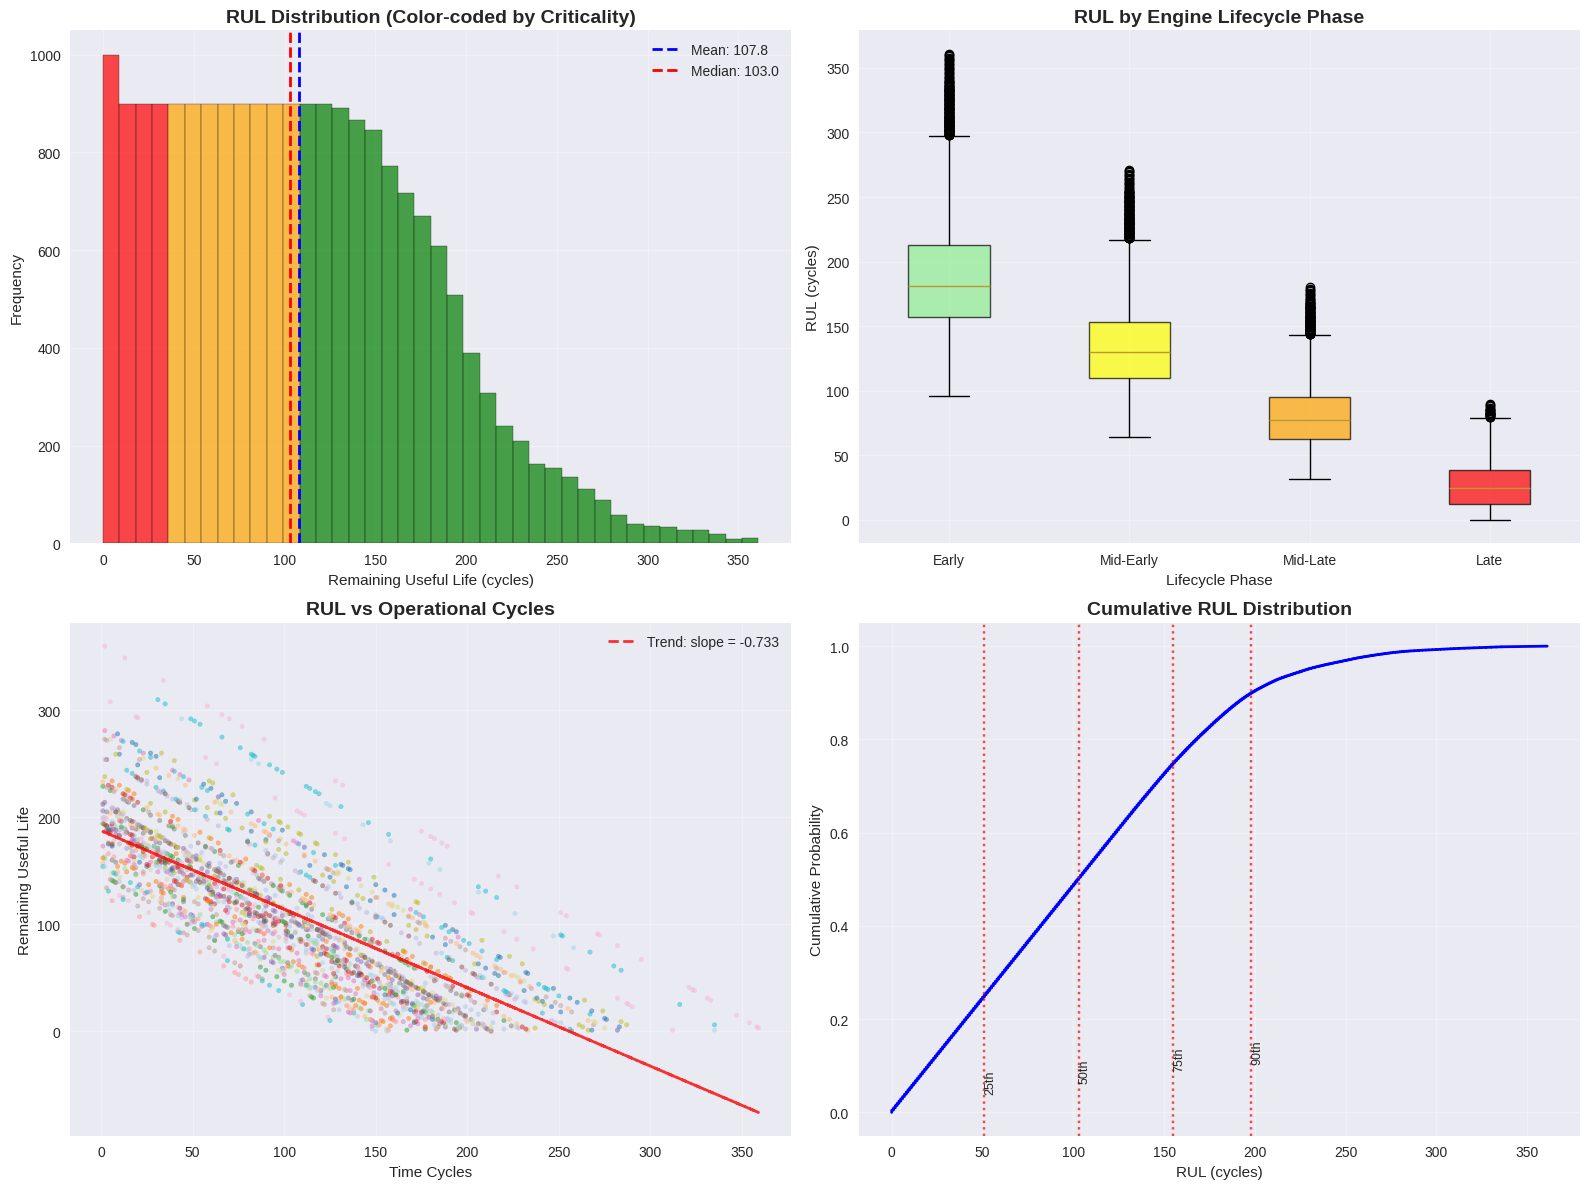


📊 RUL Distribution Insights:
• Critical engines (RUL < 30): 3,000 (14.5%)
• Warning engines (30 ≤ RUL < 100): 7,000 (33.9%)
• Healthy engines (RUL ≥ 100): 10,631 (51.5%)
• RUL skewness: 0.500
• Mean RUL: 107.8 cycles
• Median RUL: 103.0 cycles


In [9]:
# RUL distribution analysis
rul_stats = train_FD001['RUL'].describe()

# Visualization 7: RUL Distribution Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# RUL histogram with color coding
ax = axes[0, 0]
n, bins, patches = ax.hist(train_FD001['RUL'], bins=40, alpha=0.7, edgecolor='black')

# Color code the histogram
for i, (patch, bin_val) in enumerate(zip(patches, bins[:-1])):
    if bin_val < 30:
        patch.set_facecolor('red')
    elif bin_val < 100:
        patch.set_facecolor('orange')
    else:
        patch.set_facecolor('green')
    patch.set_alpha(0.7)

ax.axvline(rul_stats['mean'], color='blue', linestyle='--', linewidth=2,
           label=f'Mean: {rul_stats["mean"]:.1f}')
ax.axvline(rul_stats['50%'], color='red', linestyle='--', linewidth=2,
           label=f'Median: {rul_stats["50%"]:.1f}')
ax.set_title('RUL Distribution (Color-coded by Criticality)', fontsize=14, fontweight='bold')
ax.set_xlabel('Remaining Useful Life (cycles)')
ax.set_ylabel('Frequency')
ax.legend()
ax.grid(True, alpha=0.3)

# RUL by lifecycle phase
ax = axes[0, 1]
train_FD001['lifecycle_phase'] = train_FD001['time_cycles'] / train_FD001.groupby('unit_nr')['time_cycles'].transform('max')
lifecycle_bins = pd.cut(train_FD001['lifecycle_phase'], bins=[0, 0.25, 0.5, 0.75, 1.0],
                       labels=['Early', 'Mid-Early', 'Mid-Late', 'Late'])

rul_by_phase = [train_FD001[lifecycle_bins == phase]['RUL'].values
                for phase in ['Early', 'Mid-Early', 'Mid-Late', 'Late']
                if sum(lifecycle_bins == phase) > 0]

bp = ax.boxplot(rul_by_phase, labels=['Early', 'Mid-Early', 'Mid-Late', 'Late'], patch_artist=True)
colors = ['lightgreen', 'yellow', 'orange', 'red']
for patch, color in zip(bp['boxes'], colors[:len(bp['boxes'])]):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_title('RUL by Engine Lifecycle Phase', fontsize=14, fontweight='bold')
ax.set_xlabel('Lifecycle Phase')
ax.set_ylabel('RUL (cycles)')
ax.grid(True, alpha=0.3)

# RUL vs Time Cycles
ax = axes[1, 0]
sample_data = train_FD001.sample(n=min(2000, len(train_FD001)), random_state=42)
scatter = ax.scatter(sample_data['time_cycles'], sample_data['RUL'],
                    alpha=0.5, s=10, c=sample_data['unit_nr'], cmap='tab20')
ax.set_title('RUL vs Operational Cycles', fontsize=14, fontweight='bold')
ax.set_xlabel('Time Cycles')
ax.set_ylabel('Remaining Useful Life')
ax.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(sample_data['time_cycles'], sample_data['RUL'], 1)
p = np.poly1d(z)
ax.plot(sample_data['time_cycles'], p(sample_data['time_cycles']), "r--", alpha=0.8, linewidth=2,
        label=f'Trend: slope = {z[0]:.3f}')
ax.legend()

# Cumulative RUL distribution
ax = axes[1, 1]
rul_sorted = np.sort(train_FD001['RUL'])
cumulative = np.arange(1, len(rul_sorted) + 1) / len(rul_sorted)
ax.plot(rul_sorted, cumulative, 'b-', linewidth=2)
ax.set_title('Cumulative RUL Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('RUL (cycles)')
ax.set_ylabel('Cumulative Probability')
ax.grid(True, alpha=0.3)

# Add percentile lines
percentiles = [25, 50, 75, 90]
for p in percentiles:
    rul_p = np.percentile(train_FD001['RUL'], p)
    ax.axvline(rul_p, color='red', linestyle=':', alpha=0.7)
    ax.text(rul_p, 0.02 + p/100 * 0.1, f'{p}th', rotation=90, fontsize=9)

plt.tight_layout()
plt.savefig('images/07_rul_distribution_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# RUL statistics
critical_count = sum(train_FD001['RUL'] < 30)
warning_count = sum((train_FD001['RUL'] >= 30) & (train_FD001['RUL'] < 100))
healthy_count = sum(train_FD001['RUL'] >= 100)
total_count = len(train_FD001)

print("\n📊 RUL Distribution Insights:")
print(f"• Critical engines (RUL < 30): {critical_count:,} ({critical_count/total_count*100:.1f}%)")
print(f"• Warning engines (30 ≤ RUL < 100): {warning_count:,} ({warning_count/total_count*100:.1f}%)")
print(f"• Healthy engines (RUL ≥ 100): {healthy_count:,} ({healthy_count/total_count*100:.1f}%)")
print(f"• RUL skewness: {stats.skew(train_FD001['RUL']):.3f}")
print(f"• Mean RUL: {rul_stats['mean']:.1f} cycles")
print(f"• Median RUL: {rul_stats['50%']:.1f} cycles")

## 8. Correlation Analysis

Comprehensive correlation analysis between sensors and RUL.

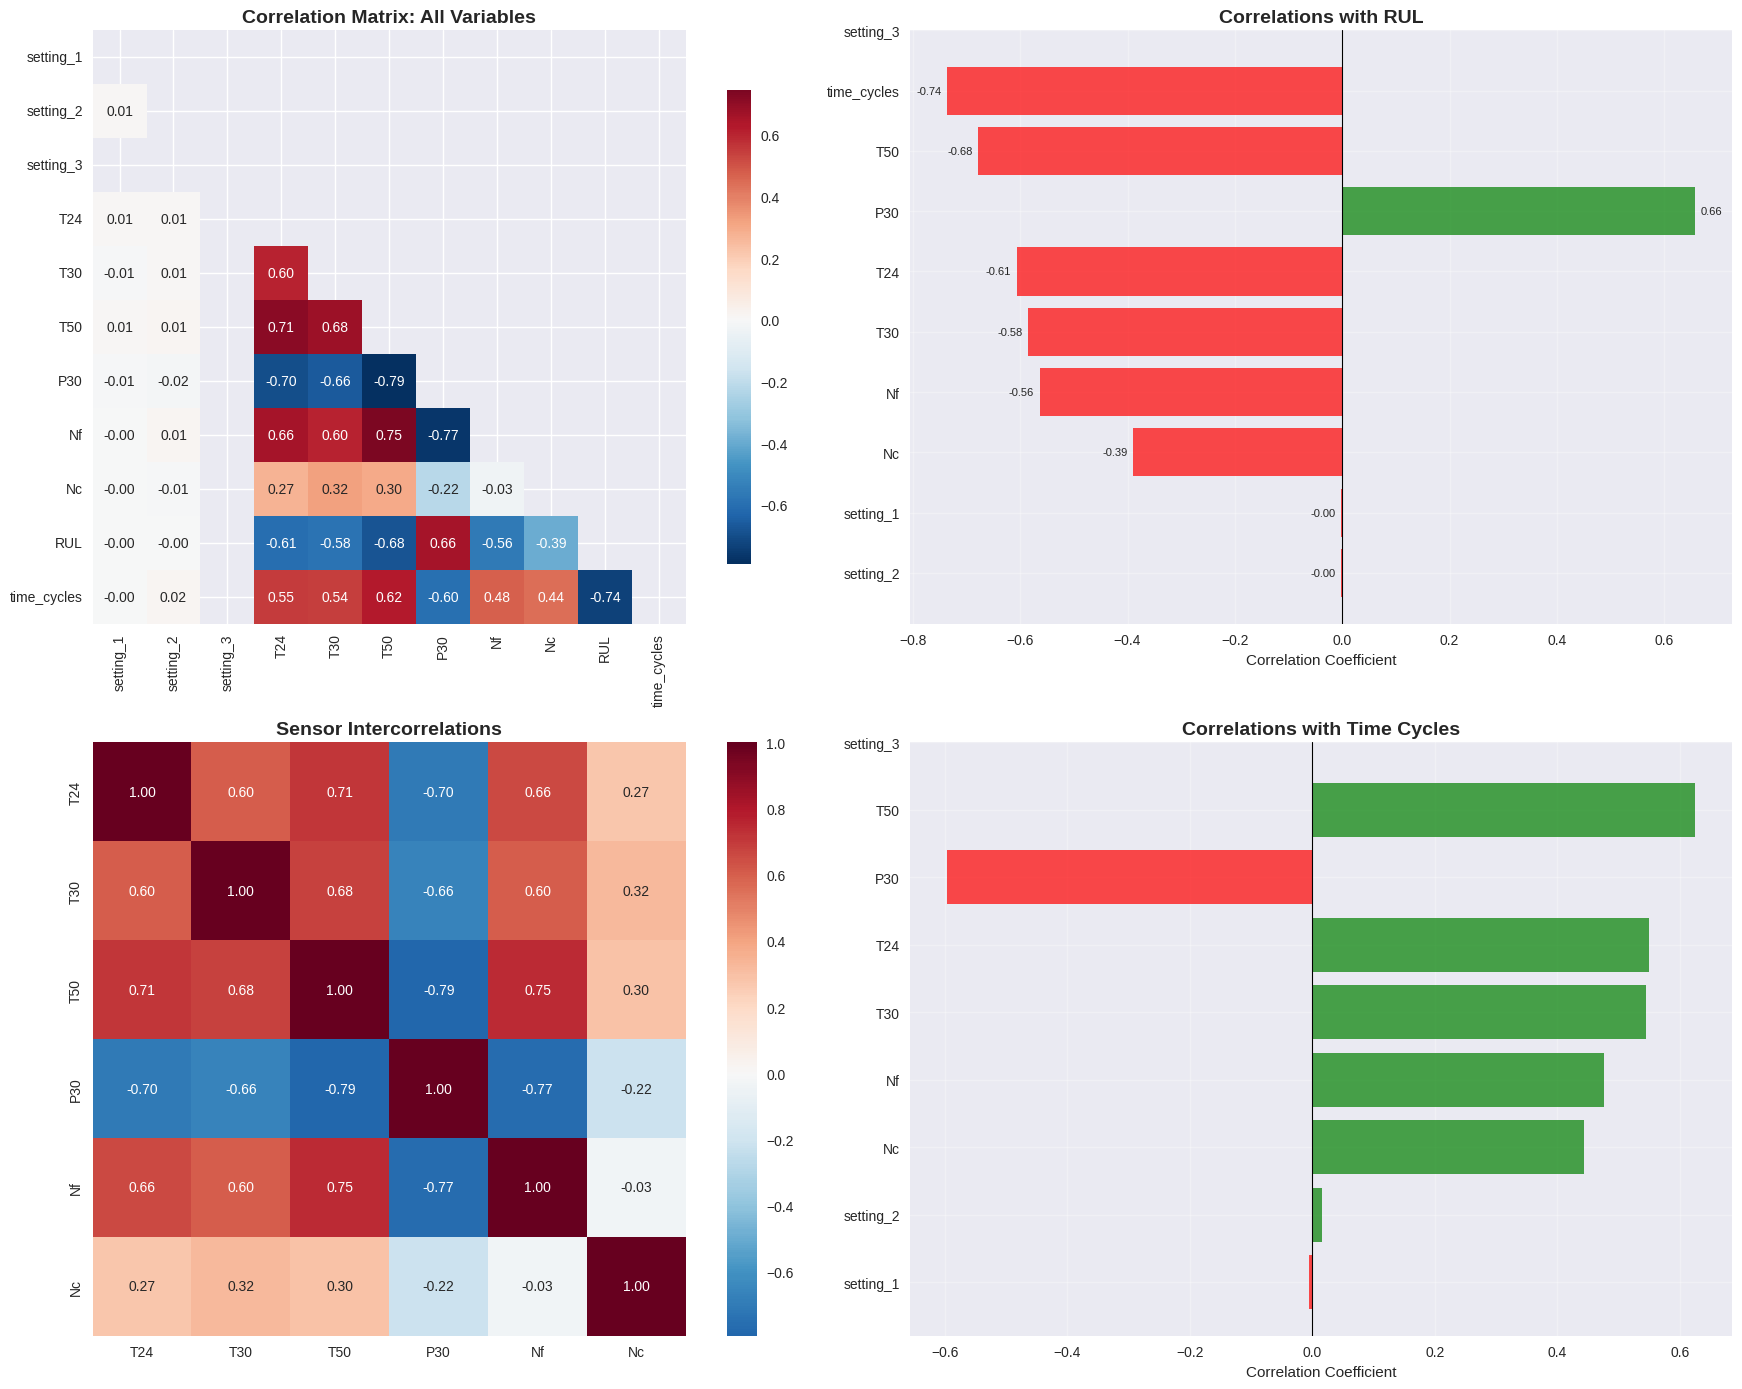


🔗 Correlation Analysis Results:

Strongest correlations with RUL:
•  time_cycles: -0.736
•          T50: -0.679
•          P30: +0.657
•          T24: -0.606
•          T30: -0.585

Strongest sensor intercorrelations:
•    T50-P30: -0.793
•     P30-Nf: -0.767
•     T50-Nf: +0.747


In [10]:
# Select key variables for correlation analysis
correlation_vars = operational_settings + key_degradation_sensors + ['RUL', 'time_cycles']
correlation_matrix = train_FD001[correlation_vars].corr()

# Visualization 8: Correlation Analysis
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Full correlation heatmap
ax = axes[0, 0]
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, ax=ax, cbar_kws={'shrink': 0.8}, fmt='.2f')
ax.set_title('Correlation Matrix: All Variables', fontsize=14, fontweight='bold')

# RUL correlations
ax = axes[0, 1]
rul_correlations = correlation_matrix['RUL'].drop('RUL').sort_values(key=abs, ascending=True)
colors = ['red' if x < 0 else 'green' for x in rul_correlations.values]
bars = ax.barh(range(len(rul_correlations)), rul_correlations.values, color=colors, alpha=0.7)
ax.set_yticks(range(len(rul_correlations)))
ax.set_yticklabels(rul_correlations.index)
ax.set_title('Correlations with RUL', fontsize=14, fontweight='bold')
ax.set_xlabel('Correlation Coefficient')
ax.axvline(0, color='black', linewidth=0.8)
ax.grid(True, alpha=0.3)

# Add value labels
for i, (bar, val) in enumerate(zip(bars, rul_correlations.values)):
    ax.text(val + 0.01 if val >= 0 else val - 0.01, i, f'{val:.2f}',
            va='center', ha='left' if val >= 0 else 'right', fontsize=8)

# Sensor intercorrelations (simplified network view)
ax = axes[1, 0]
sensor_corr = correlation_matrix.loc[key_degradation_sensors, key_degradation_sensors]
sns.heatmap(sensor_corr, annot=True, cmap='RdBu_r', center=0, square=True, ax=ax, fmt='.2f')
ax.set_title('Sensor Intercorrelations', fontsize=14, fontweight='bold')

# Time cycles correlations
ax = axes[1, 1]
cycles_correlations = correlation_matrix['time_cycles'].drop(['time_cycles', 'RUL']).sort_values(key=abs, ascending=True)
colors = ['red' if x < 0 else 'green' for x in cycles_correlations.values]
bars = ax.barh(range(len(cycles_correlations)), cycles_correlations.values, color=colors, alpha=0.7)
ax.set_yticks(range(len(cycles_correlations)))
ax.set_yticklabels(cycles_correlations.index)
ax.set_title('Correlations with Time Cycles', fontsize=14, fontweight='bold')
ax.set_xlabel('Correlation Coefficient')
ax.axvline(0, color='black', linewidth=0.8)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('images/08_correlation_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Correlation analysis results
print("\n🔗 Correlation Analysis Results:")
print("\nStrongest correlations with RUL:")
strong_rul_corrs = rul_correlations[abs(rul_correlations) > 0.1].sort_values(key=abs, ascending=False)
for sensor, corr in strong_rul_corrs.head(5).items():
    print(f"• {sensor:>12}: {corr:+.3f}")

# Find strongest sensor pair correlation
sensor_pairs = []
for i, sensor1 in enumerate(key_degradation_sensors):
    for j, sensor2 in enumerate(key_degradation_sensors):
        if i < j:
            corr_val = sensor_corr.loc[sensor1, sensor2]
            sensor_pairs.append((f"{sensor1}-{sensor2}", corr_val))

sensor_pairs.sort(key=lambda x: abs(x[1]), reverse=True)
print("\nStrongest sensor intercorrelations:")
for pair, corr in sensor_pairs[:3]:
    print(f"• {pair:>10}: {corr:+.3f}")

## 9. Fault Progression Analysis

Analysis of how faults develop over engine lifecycles.

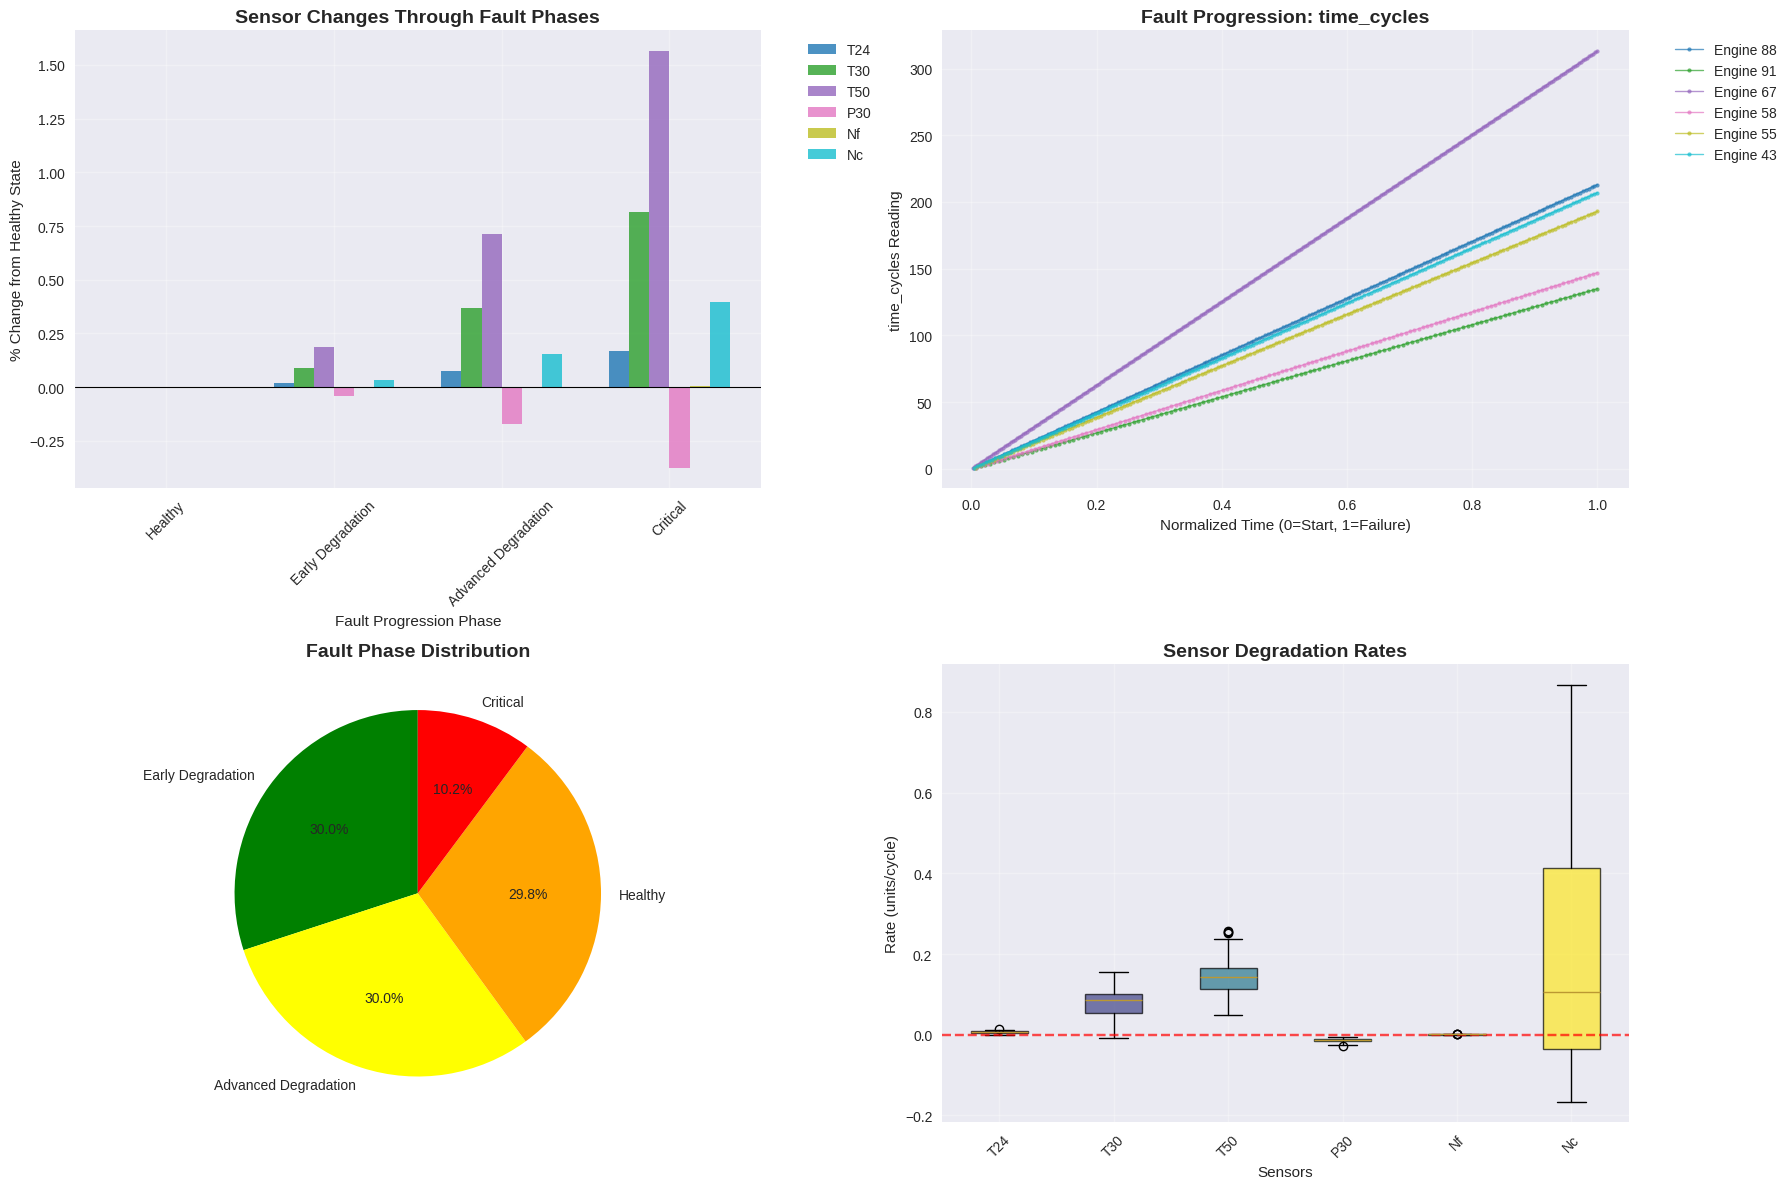


⚠️ Fault Progression Analysis:

Most prognostic sensor: time_cycles (r=-0.736)

Sensor changes by fault phase:

Early Degradation:
•    T50: +0.2%
•    T30: +0.1%
•    P30: -0.0%

Advanced Degradation:
•    T50: +0.7%
•    T30: +0.4%
•    P30: -0.2%

Critical:
•    T50: +1.6%
•    T30: +0.8%
•     Nc: +0.4%

Fault phase distribution:
•    Early Degradation: 6,194 (30.0%)
• Advanced Degradation: 6,187 (30.0%)
•              Healthy: 6,144 (29.8%)
•             Critical: 2,106 (10.2%)


In [11]:
# Add fault progression features
train_FD001['normalized_time'] = train_FD001['time_cycles'] / train_FD001.groupby('unit_nr')['time_cycles'].transform('max')
train_FD001['fault_phase'] = pd.cut(train_FD001['normalized_time'],
                                   bins=[0, 0.3, 0.6, 0.9, 1.0],
                                   labels=['Healthy', 'Early Degradation', 'Advanced Degradation', 'Critical'])

# Visualization 9: Fault Progression Analysis
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Sensor evolution through fault phases
ax = axes[0, 0]
phase_means = train_FD001.groupby('fault_phase')[key_degradation_sensors].mean()
healthy_values = phase_means.loc['Healthy']
normalized_progression = ((phase_means - healthy_values) / healthy_values * 100)

x_pos = np.arange(len(phase_means.index))
width = 0.12
colors = plt.cm.tab10(np.linspace(0, 1, len(key_degradation_sensors)))

for i, sensor in enumerate(key_degradation_sensors):
    ax.bar(x_pos + i*width, normalized_progression[sensor], width,
           label=sensor, color=colors[i], alpha=0.8)

ax.set_title('Sensor Changes Through Fault Phases', fontsize=14, fontweight='bold')
ax.set_xlabel('Fault Progression Phase')
ax.set_ylabel('% Change from Healthy State')
ax.set_xticks(x_pos + width * (len(key_degradation_sensors)-1) / 2)
ax.set_xticklabels(phase_means.index, rotation=45)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)
ax.axhline(0, color='black', linewidth=0.8)

# Individual engine fault progression
ax = axes[0, 1]
most_prognostic_sensor = rul_correlations.abs().idxmax()

# Plot fault progression for sample engines
sample_engines = np.random.choice(train_FD001['unit_nr'].unique(), size=6, replace=False)
colors = plt.cm.tab10(np.linspace(0, 1, len(sample_engines)))

for i, engine in enumerate(sample_engines):
    engine_data = train_FD001[train_FD001['unit_nr'] == engine]
    ax.plot(engine_data['normalized_time'], engine_data[most_prognostic_sensor],
           'o-', color=colors[i], alpha=0.7, markersize=3, linewidth=1,
           label=f'Engine {engine}')

ax.set_title(f'Fault Progression: {most_prognostic_sensor}', fontsize=14, fontweight='bold')
ax.set_xlabel('Normalized Time (0=Start, 1=Failure)')
ax.set_ylabel(f'{most_prognostic_sensor} Reading')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)

# Fault phase distribution
ax = axes[1, 0]
phase_counts = train_FD001['fault_phase'].value_counts()
colors_pie = ['green', 'yellow', 'orange', 'red']
wedges, texts, autotexts = ax.pie(phase_counts.values, labels=phase_counts.index,
                                 autopct='%1.1f%%', startangle=90, colors=colors_pie)
ax.set_title('Fault Phase Distribution', fontsize=14, fontweight='bold')

# Rate of change analysis
ax = axes[1, 1]

def calculate_rates(group):
    rates = {}
    for sensor in key_degradation_sensors:
        if len(group) > 1:
            rates[f'{sensor}_rate'] = (group[sensor].iloc[-1] - group[sensor].iloc[0]) / len(group)
        else:
            rates[f'{sensor}_rate'] = 0
    return pd.Series(rates)

engine_rates = train_FD001.groupby('unit_nr').apply(calculate_rates)
rate_columns = [f'{sensor}_rate' for sensor in key_degradation_sensors]
rate_data = [engine_rates[col].dropna() for col in rate_columns]

bp = ax.boxplot(rate_data, labels=key_degradation_sensors, patch_artist=True)
colors = plt.cm.viridis(np.linspace(0, 1, len(key_degradation_sensors)))
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_title('Sensor Degradation Rates', fontsize=14, fontweight='bold')
ax.set_xlabel('Sensors')
ax.set_ylabel('Rate (units/cycle)')
ax.tick_params(axis='x', rotation=45)
ax.grid(True, alpha=0.3)
ax.axhline(0, color='red', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('images/09_fault_progression_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n⚠️ Fault Progression Analysis:")
print(f"\nMost prognostic sensor: {most_prognostic_sensor} (r={rul_correlations[most_prognostic_sensor]:.3f})")

print("\nSensor changes by fault phase:")
for phase in ['Early Degradation', 'Advanced Degradation', 'Critical']:
    if phase in normalized_progression.index:
        print(f"\n{phase}:")
        phase_changes = normalized_progression.loc[phase].sort_values(key=abs, ascending=False)
        for sensor, change in phase_changes.head(3).items():
            print(f"• {sensor:>6}: {change:+.1f}%")

print(f"\nFault phase distribution:")
for phase, count in phase_counts.items():
    print(f"• {phase:>20}: {count:,} ({count/phase_counts.sum()*100:.1f}%)")

## 10. Predictive Insights

Final analysis focusing on predictive capabilities.

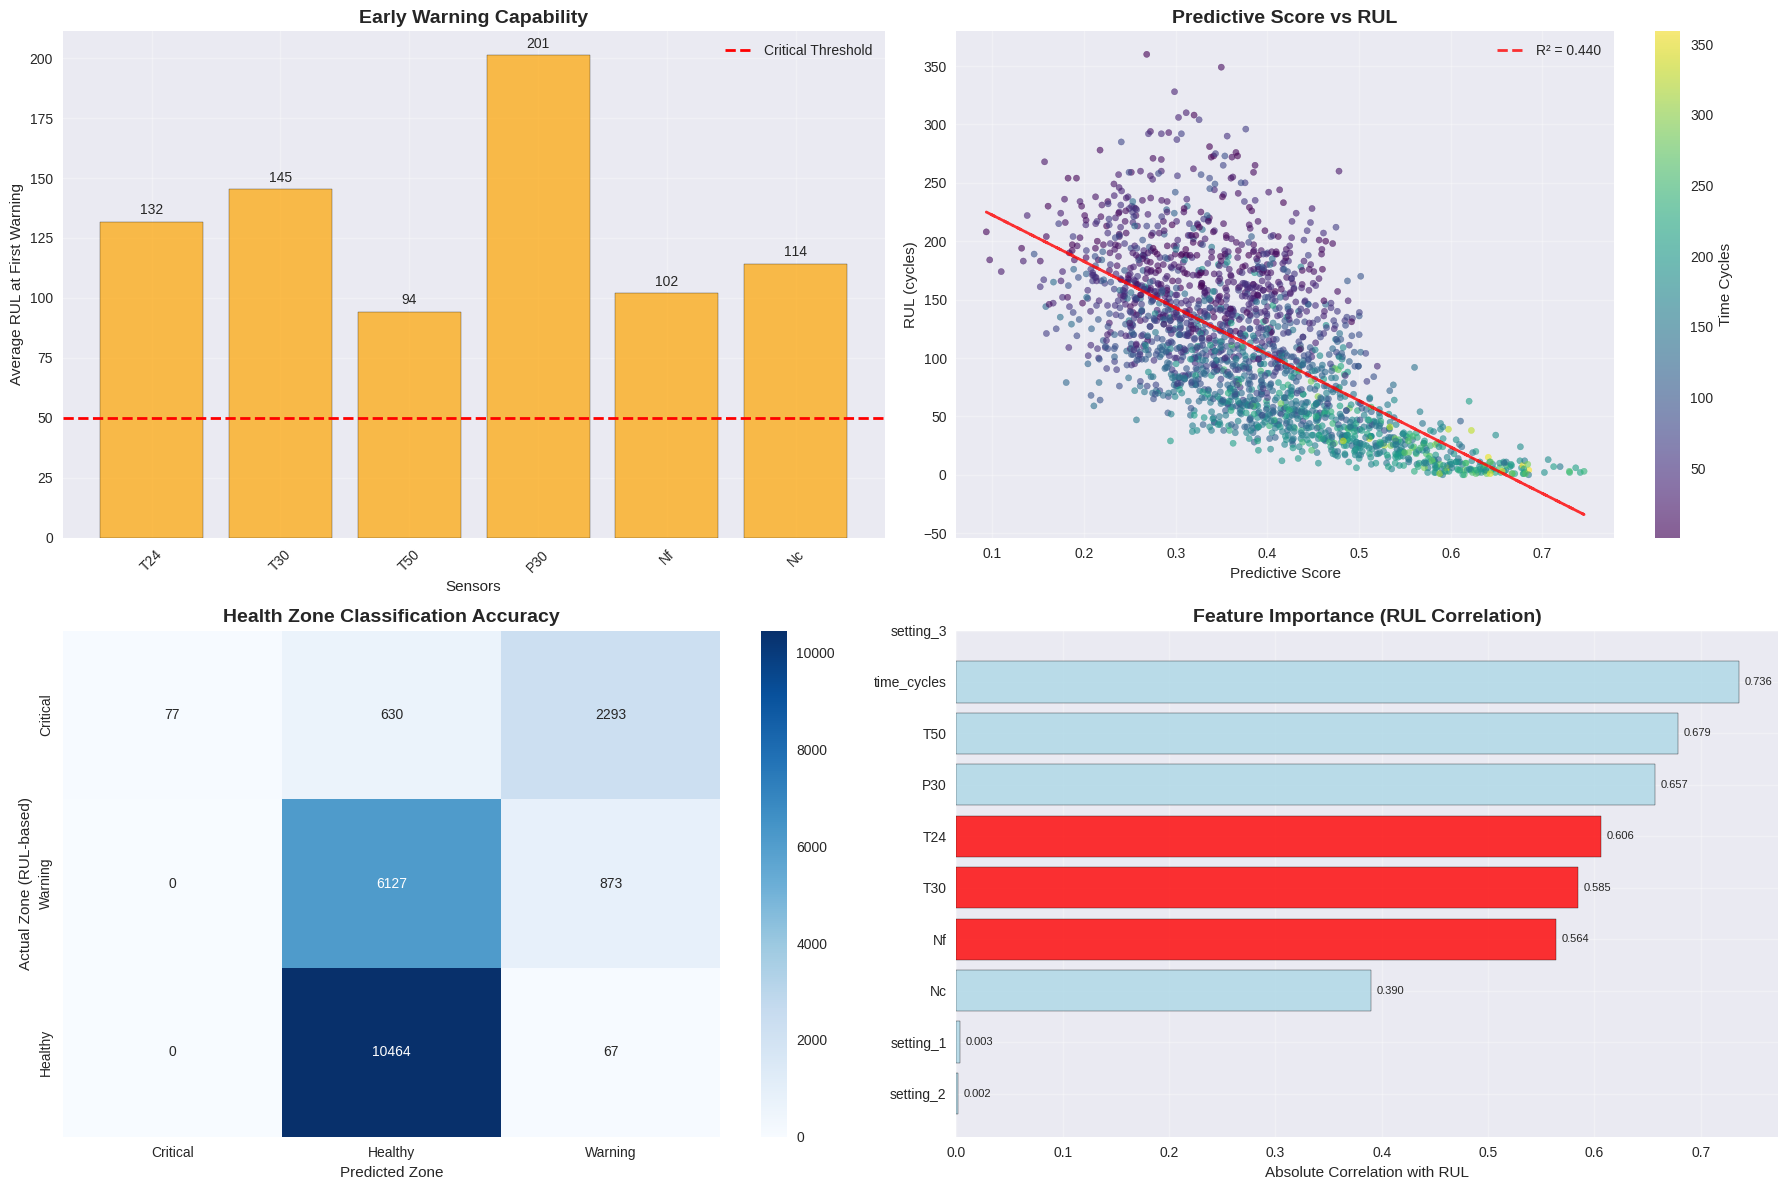


🎯 Predictive Insights Summary:

Best early warning sensors:
•    P30: 201 cycles
•    T30: 145 cycles
•    T24: 132 cycles

Top predictive features:
•          T50: 0.679
•  time_cycles: 0.736
•    setting_3: nan

Performance Metrics:
• Health zone classification accuracy: 30.5%
• Composite score correlation with RUL: -0.678
• Best single predictor: time_cycles (0.736)


In [12]:
# Predictive insights analysis
# Create predictive score based on key sensors
top_predictive_sensors = ['T24', 'T30', 'Nf']  # Top sensors based on RUL correlation
scaler = MinMaxScaler()
normalized_sensors = scaler.fit_transform(train_FD001[top_predictive_sensors])
train_FD001['predictive_score'] = np.mean(normalized_sensors, axis=1)

# Visualization 10: Predictive Insights
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Early warning analysis
ax = axes[0, 0]
early_warning_analysis = {}
for sensor in key_degradation_sensors:
    sensor_threshold = train_FD001[sensor].quantile(0.8)
    warning_times = []

    for unit in train_FD001['unit_nr'].unique():
        unit_data = train_FD001[train_FD001['unit_nr'] == unit].sort_values('time_cycles')
        exceeds_threshold = unit_data[unit_data[sensor] > sensor_threshold]
        if len(exceeds_threshold) > 0:
            first_warning_rul = exceeds_threshold.iloc[0]['RUL']
            warning_times.append(first_warning_rul)

    if warning_times:
        early_warning_analysis[sensor] = np.mean(warning_times)

sensors = list(early_warning_analysis.keys())
warning_times = list(early_warning_analysis.values())

bars = ax.bar(sensors, warning_times, color='orange', alpha=0.7, edgecolor='black')
ax.axhline(50, color='red', linestyle='--', linewidth=2, label='Critical Threshold')
ax.set_title('Early Warning Capability', fontsize=14, fontweight='bold')
ax.set_xlabel('Sensors')
ax.set_ylabel('Average RUL at First Warning')
ax.tick_params(axis='x', rotation=45)
ax.legend()
ax.grid(True, alpha=0.3)

for bar, val in zip(bars, warning_times):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, f'{val:.0f}',
           ha='center', va='bottom')

# Predictive score vs RUL
ax = axes[0, 1]
sample_data = train_FD001.sample(n=min(2000, len(train_FD001)), random_state=42)
scatter = ax.scatter(sample_data['predictive_score'], sample_data['RUL'],
                    c=sample_data['time_cycles'], cmap='viridis', alpha=0.6, s=20)
ax.set_title('Predictive Score vs RUL', fontsize=14, fontweight='bold')
ax.set_xlabel('Predictive Score')
ax.set_ylabel('RUL (cycles)')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Time Cycles')
ax.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(sample_data['predictive_score'], sample_data['RUL'], 1)
p = np.poly1d(z)
ax.plot(sample_data['predictive_score'], p(sample_data['predictive_score']), "r--",
        alpha=0.8, linewidth=2,
        label=f'R² = {np.corrcoef(sample_data["predictive_score"], sample_data["RUL"])[0,1]**2:.3f}')
ax.legend()

# Health zone classification
ax = axes[1, 0]

def classify_health_zone(row):
    if row['predictive_score'] > 0.7:
        return 'Critical'
    elif row['predictive_score'] > 0.5:
        return 'Warning'
    else:
        return 'Healthy'

train_FD001['predicted_zone'] = train_FD001.apply(classify_health_zone, axis=1)
train_FD001['actual_zone'] = pd.cut(train_FD001['RUL'],
                                   bins=[0, 30, 100, float('inf')],
                                   labels=['Critical', 'Warning', 'Healthy'])

zone_comparison = pd.crosstab(train_FD001['actual_zone'], train_FD001['predicted_zone'])
sns.heatmap(zone_comparison, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_title('Health Zone Classification Accuracy', fontsize=14, fontweight='bold')
ax.set_xlabel('Predicted Zone')
ax.set_ylabel('Actual Zone (RUL-based)')

# Feature importance
ax = axes[1, 1]
feature_importance = rul_correlations.abs().sort_values(ascending=True)
colors = ['red' if x in top_predictive_sensors else 'lightblue' for x in feature_importance.index]
bars = ax.barh(range(len(feature_importance)), feature_importance.values,
               color=colors, alpha=0.8, edgecolor='black')
ax.set_yticks(range(len(feature_importance)))
ax.set_yticklabels(feature_importance.index)
ax.set_title('Feature Importance (RUL Correlation)', fontsize=14, fontweight='bold')
ax.set_xlabel('Absolute Correlation with RUL')
ax.grid(True, alpha=0.3)

for i, (bar, val) in enumerate(zip(bars, feature_importance.values)):
    ax.text(val + 0.005, i, f'{val:.3f}', va='center', ha='left', fontsize=8)

plt.tight_layout()
plt.savefig('images/10_predictive_insights.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate accuracy metrics
overall_accuracy = np.trace(zone_comparison.values) / zone_comparison.values.sum()
composite_correlation = np.corrcoef(train_FD001['predictive_score'], train_FD001['RUL'])[0,1]

print("\n🎯 Predictive Insights Summary:")
print(f"\nBest early warning sensors:")
for sensor, warning_time in sorted(early_warning_analysis.items(),
                                  key=lambda x: x[1], reverse=True)[:3]:
    print(f"• {sensor:>6}: {warning_time:.0f} cycles")

print(f"\nTop predictive features:")
for sensor, importance in feature_importance.tail(3).items():
    print(f"• {sensor:>12}: {importance:.3f}")

print(f"\nPerformance Metrics:")
print(f"• Health zone classification accuracy: {overall_accuracy:.1%}")
print(f"• Composite score correlation with RUL: {composite_correlation:.3f}")

best_sensor = feature_importance.idxmax()
print(f"• Best single predictor: {best_sensor} ({feature_importance[best_sensor]:.3f})")